## K-Mean Part.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C://Users//rd//Documents/UDEMY/DATA/bank-full.csv")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.columns.shape

(21,)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='age', ylabel='Count'>

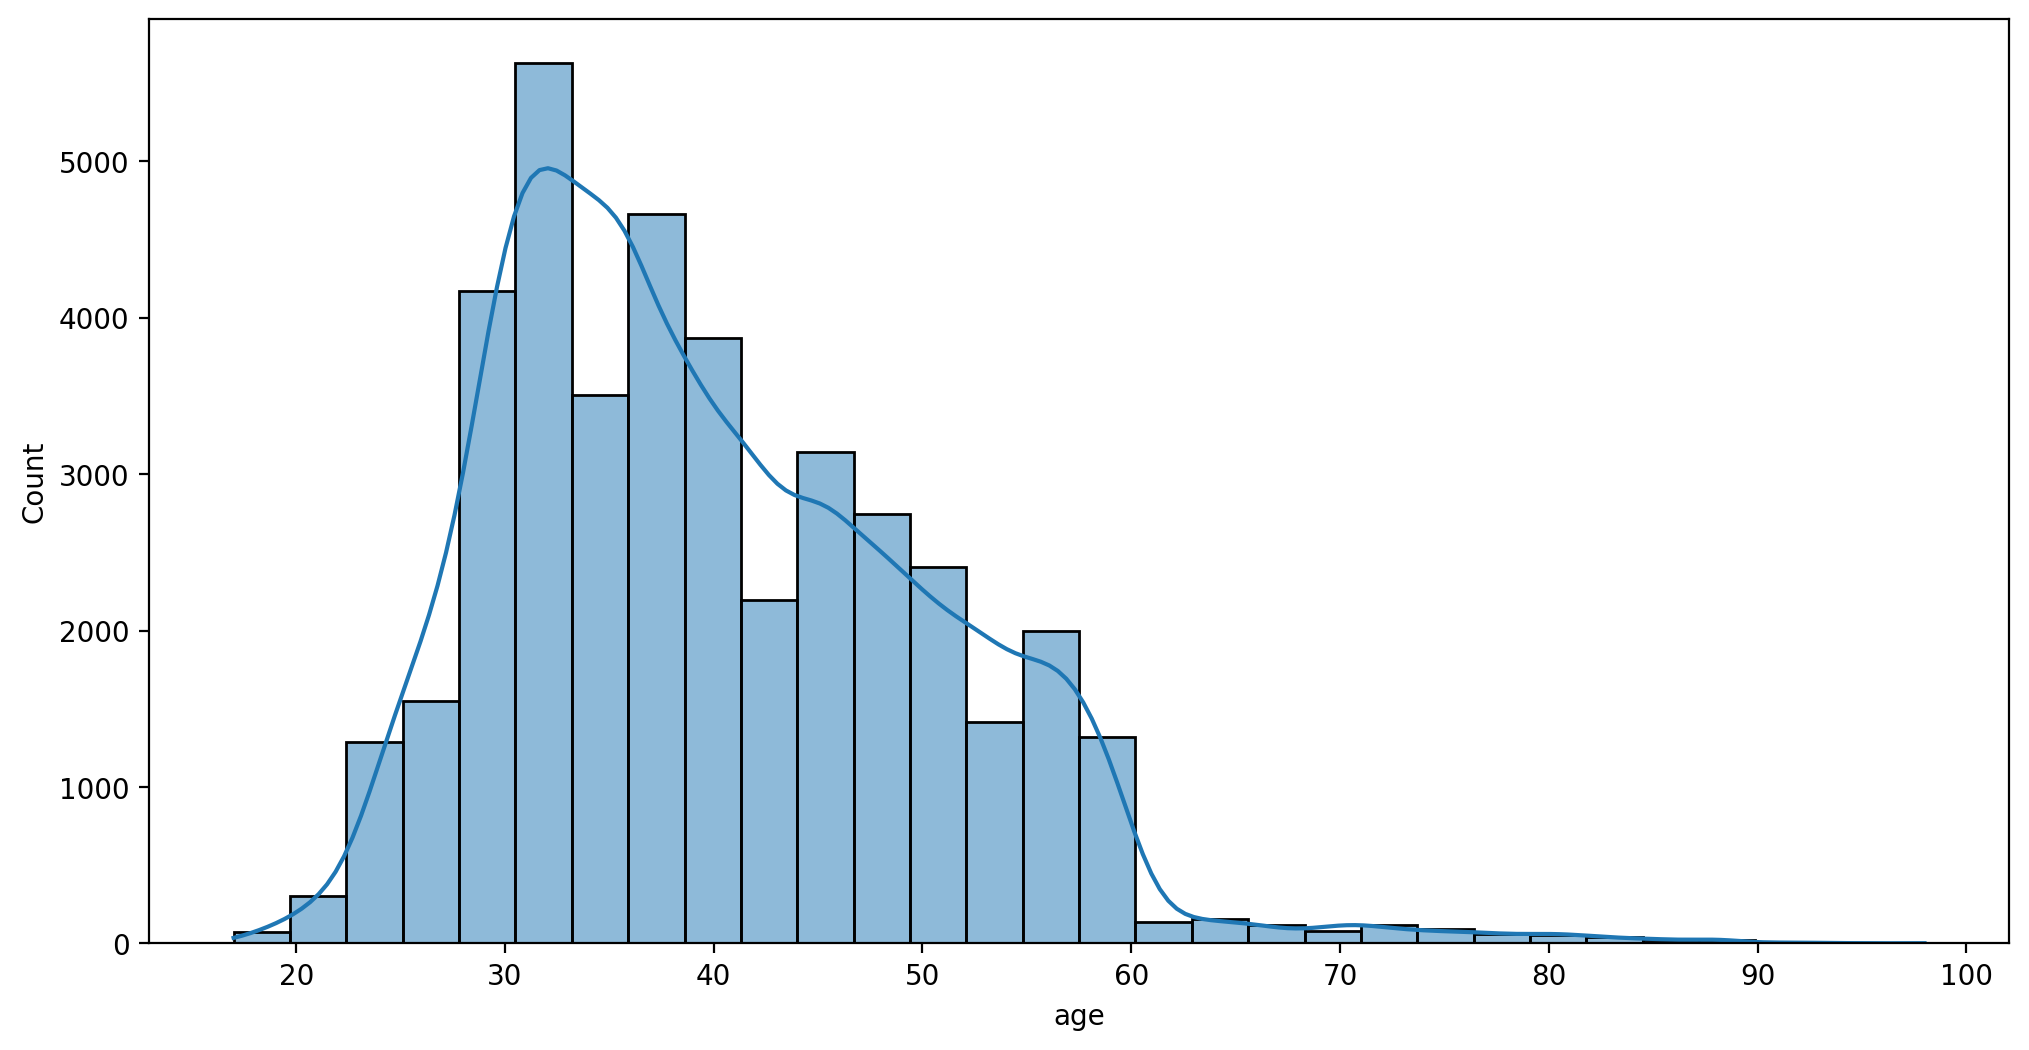

In [9]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="age", bins=30, kde=True)

<Axes: xlabel='age', ylabel='Count'>

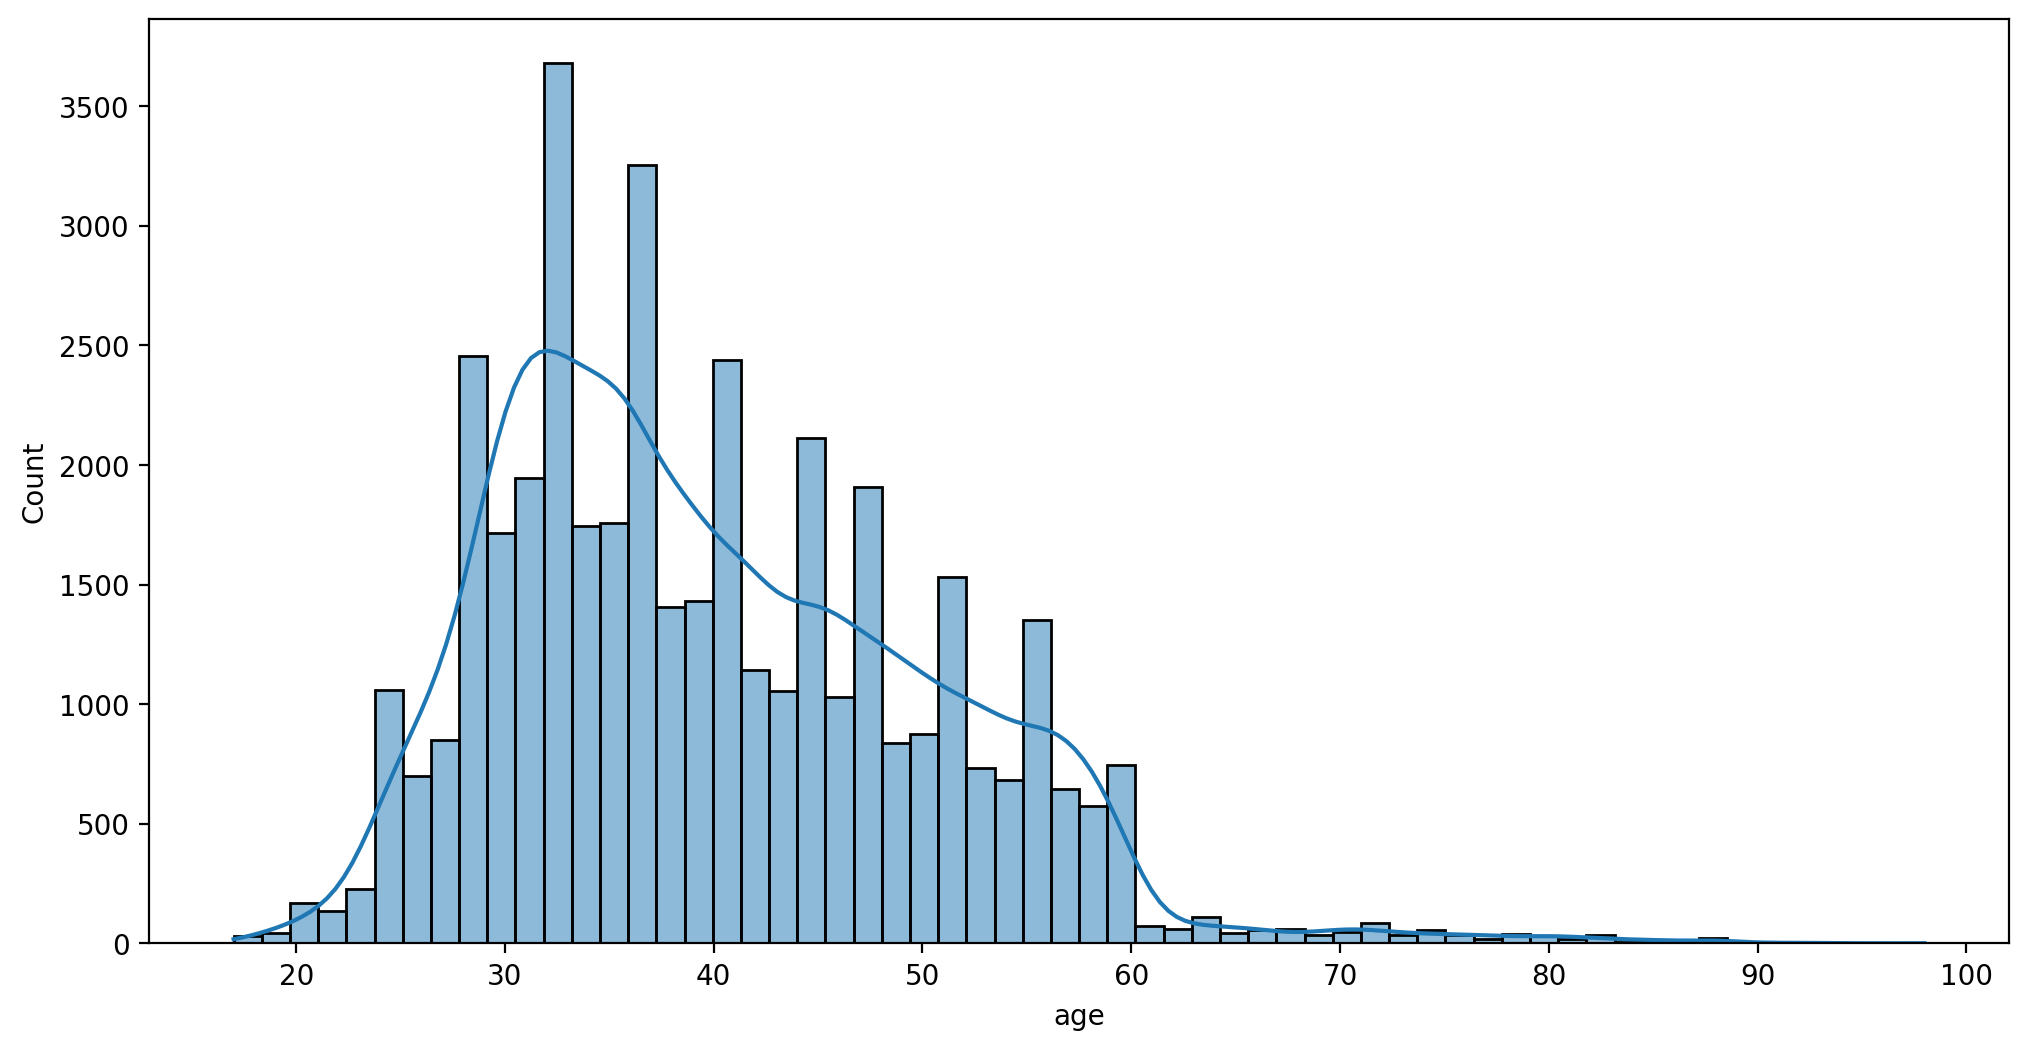

In [10]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="age", bins=60, kde=True)

<Axes: xlabel='age', ylabel='Count'>

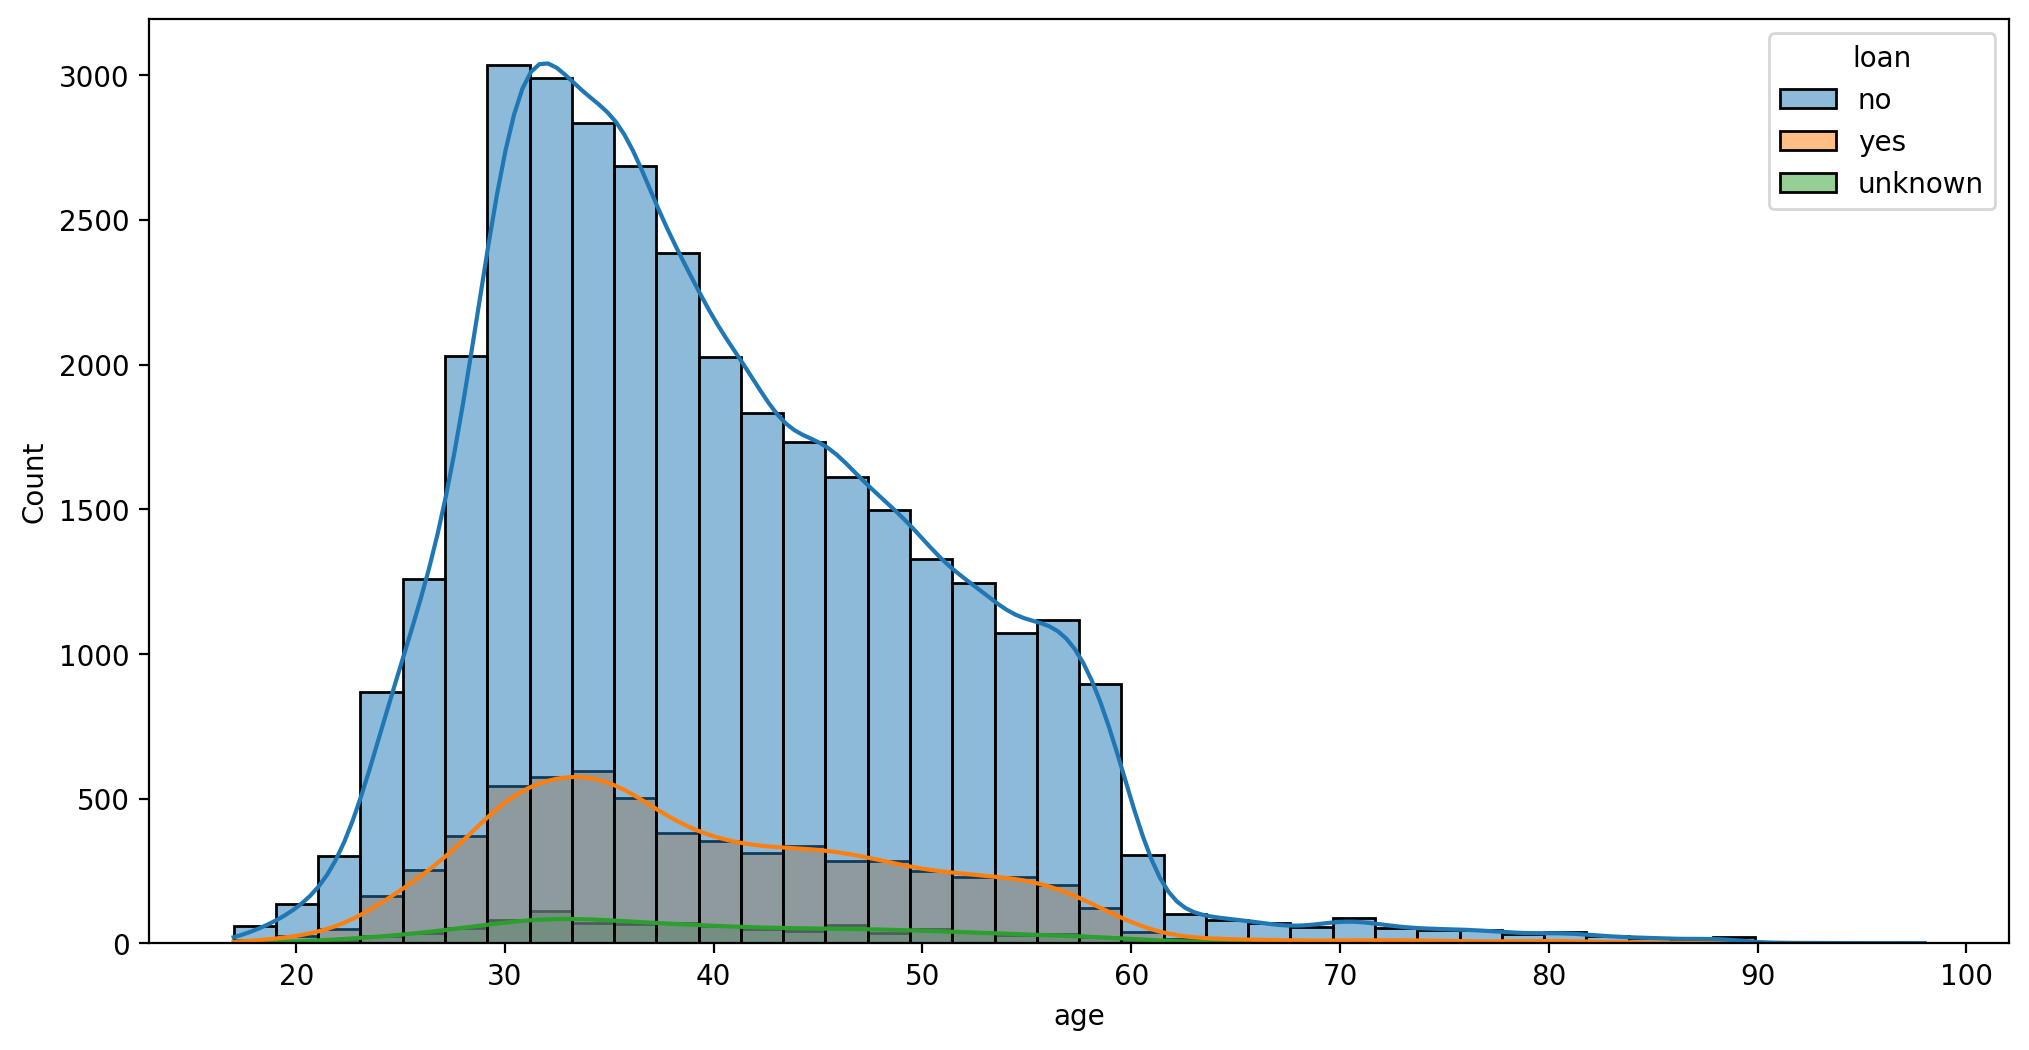

In [11]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="age", bins=40, kde=True, hue="loan")

<Axes: xlabel='age', ylabel='Count'>

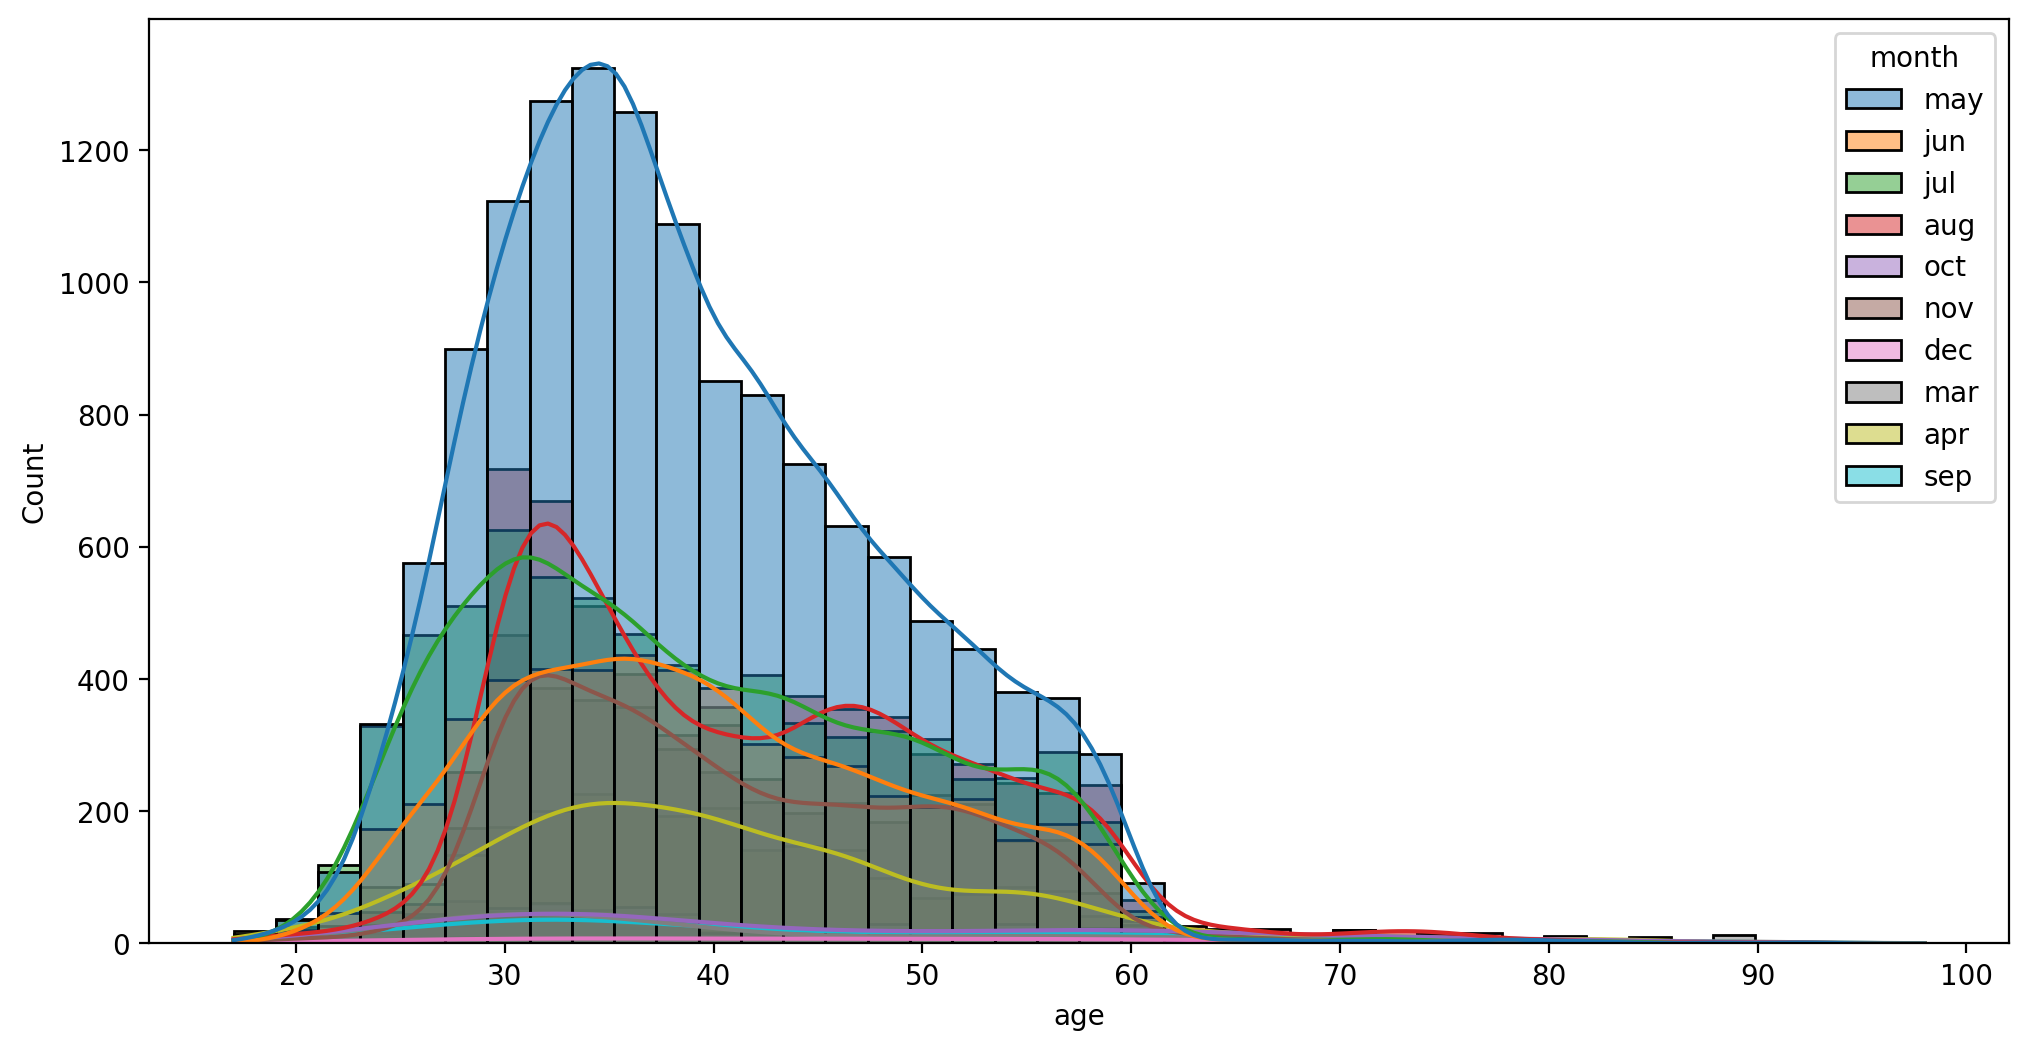

In [12]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="age", bins=40, kde=True, hue="month")

<Axes: xlabel='pdays', ylabel='Count'>

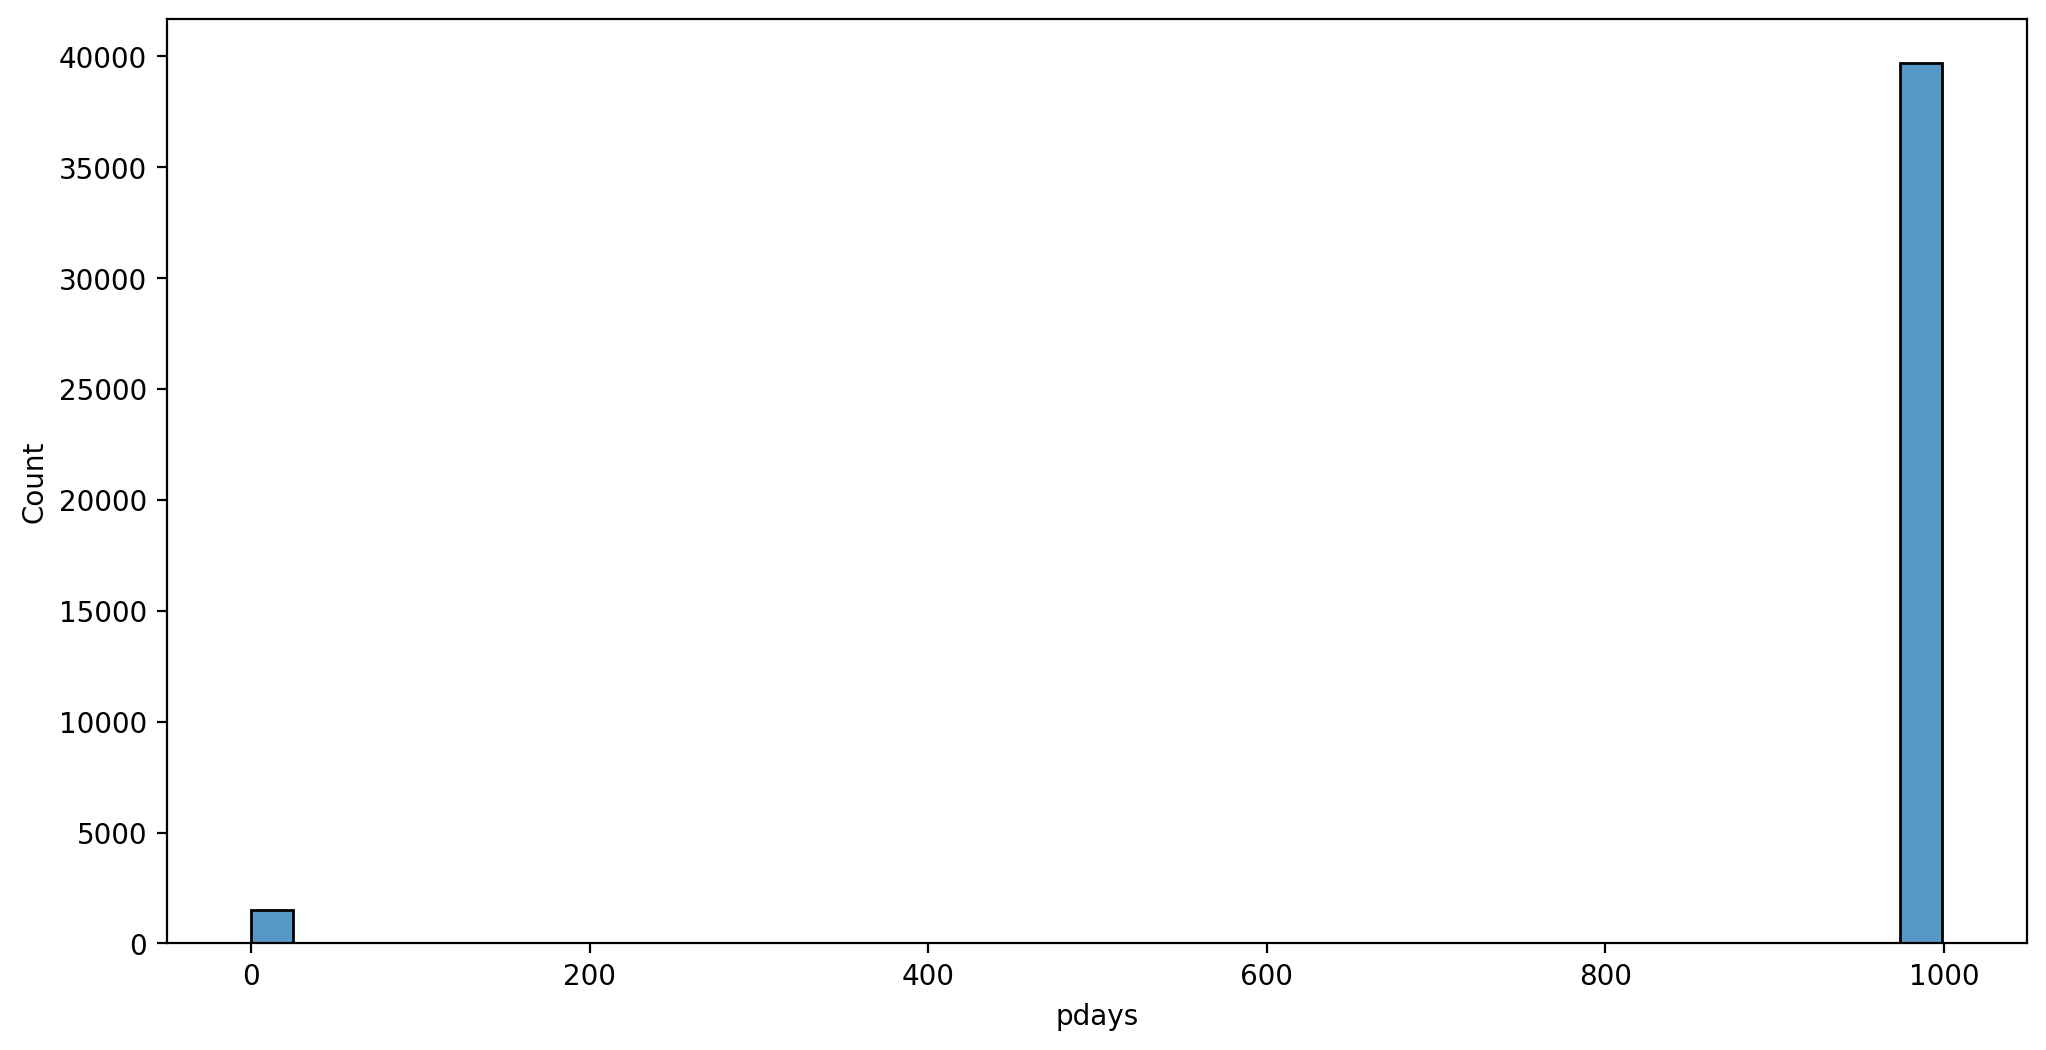

In [13]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="pdays", bins=40)

<Axes: xlabel='pdays', ylabel='Count'>

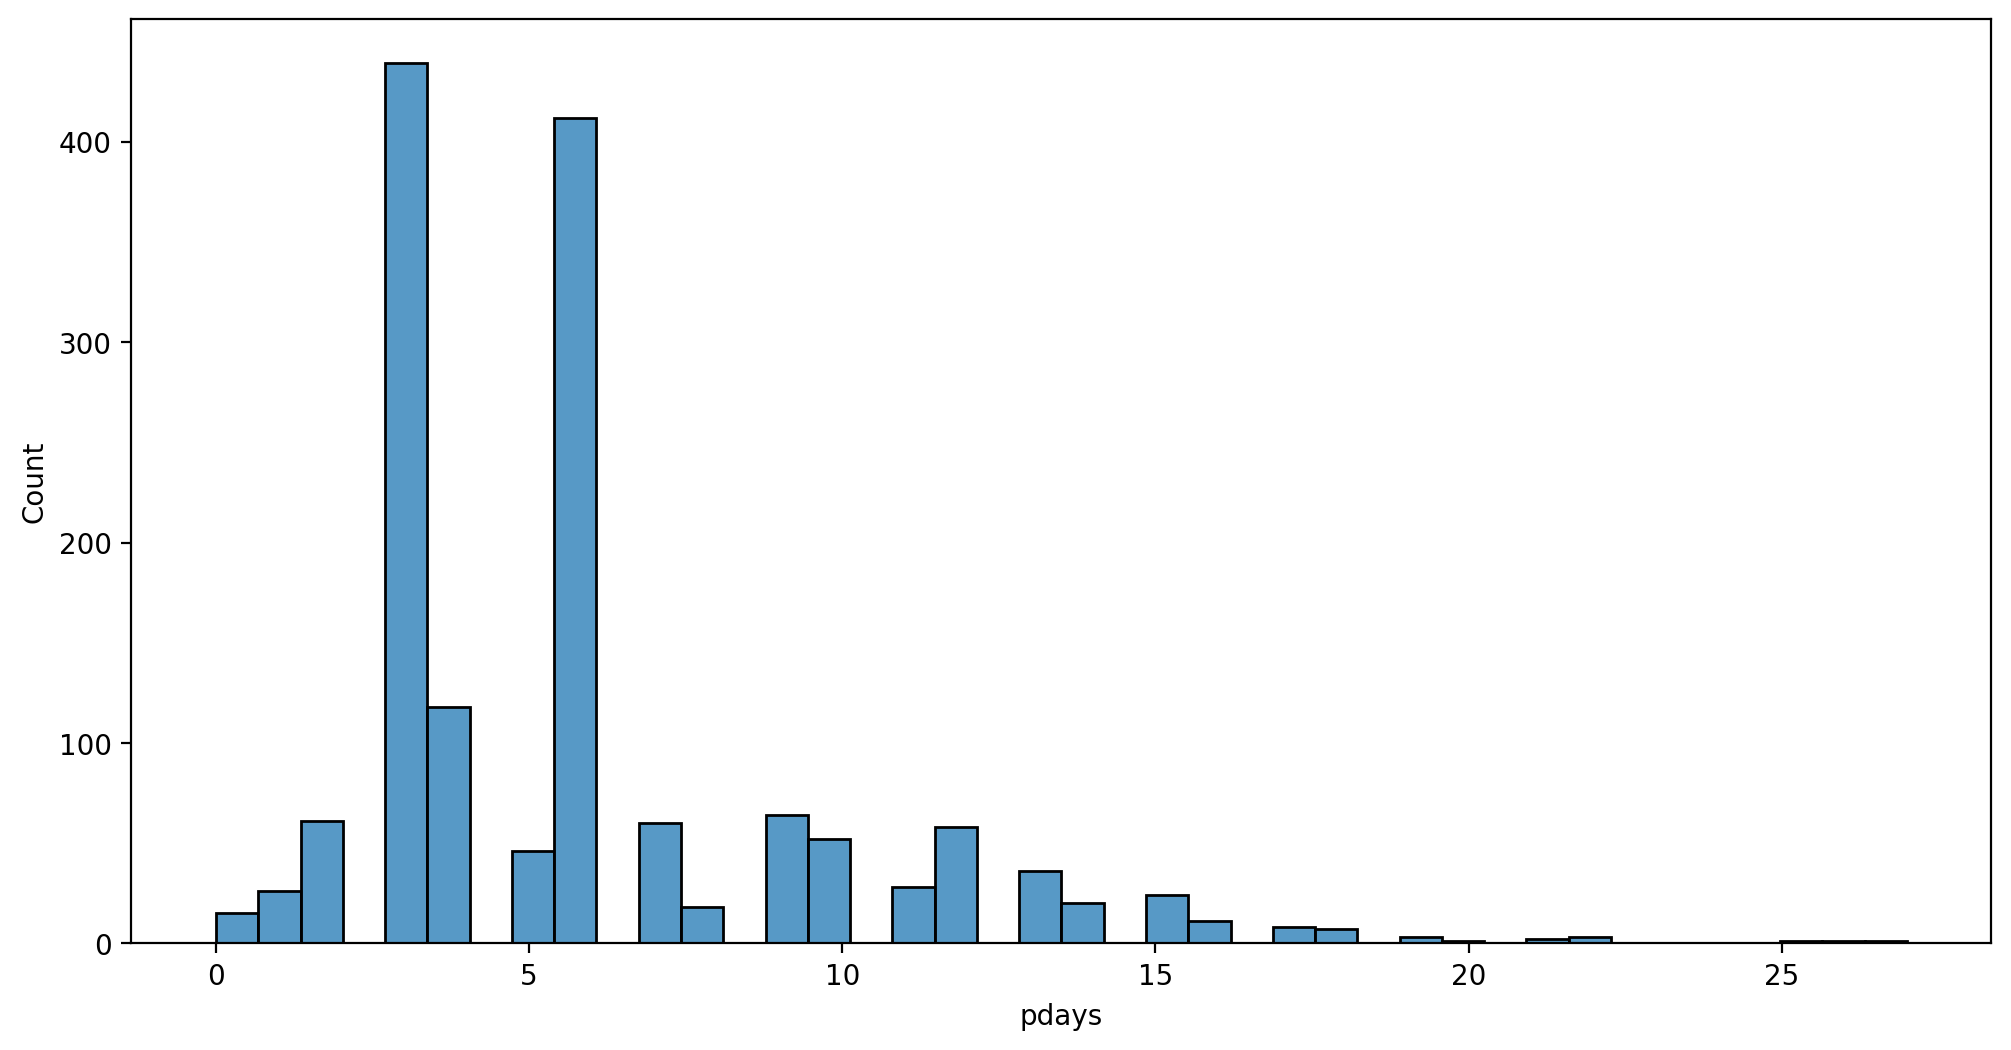

In [14]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df[df["pdays"]!=999], x="pdays", bins=40)

In [15]:
(df["pdays"] == 999).sum()

39673

In [16]:
len(df["pdays"])

41188

In [17]:
(df["pdays"] < 999).sum()

1515

In [18]:
(df["pdays"] > 999).sum()

0

<Axes: xlabel='pdays', ylabel='Count'>

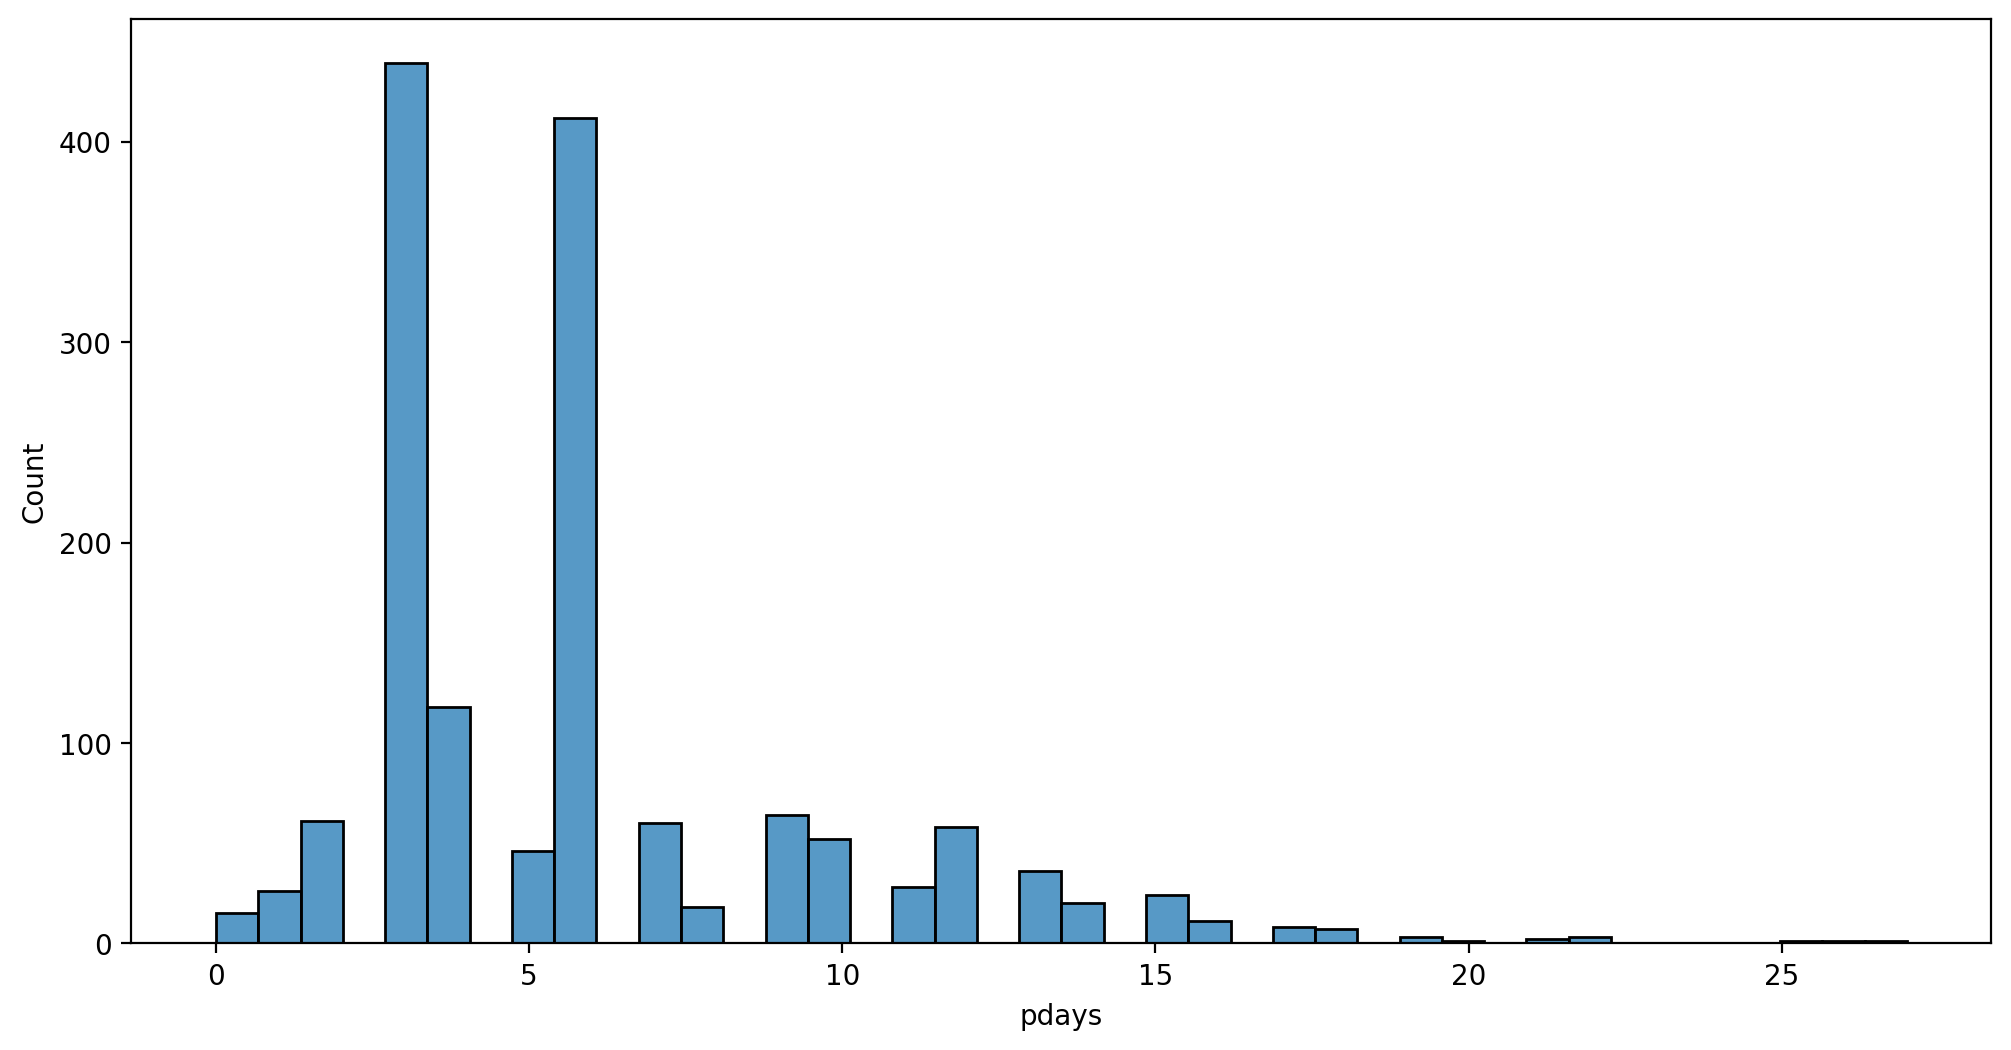

In [19]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df[df["pdays"]!=999], x="pdays", bins=40)
#plt.xlim(0, 100)

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [21]:
df["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [22]:
df["duration"]

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

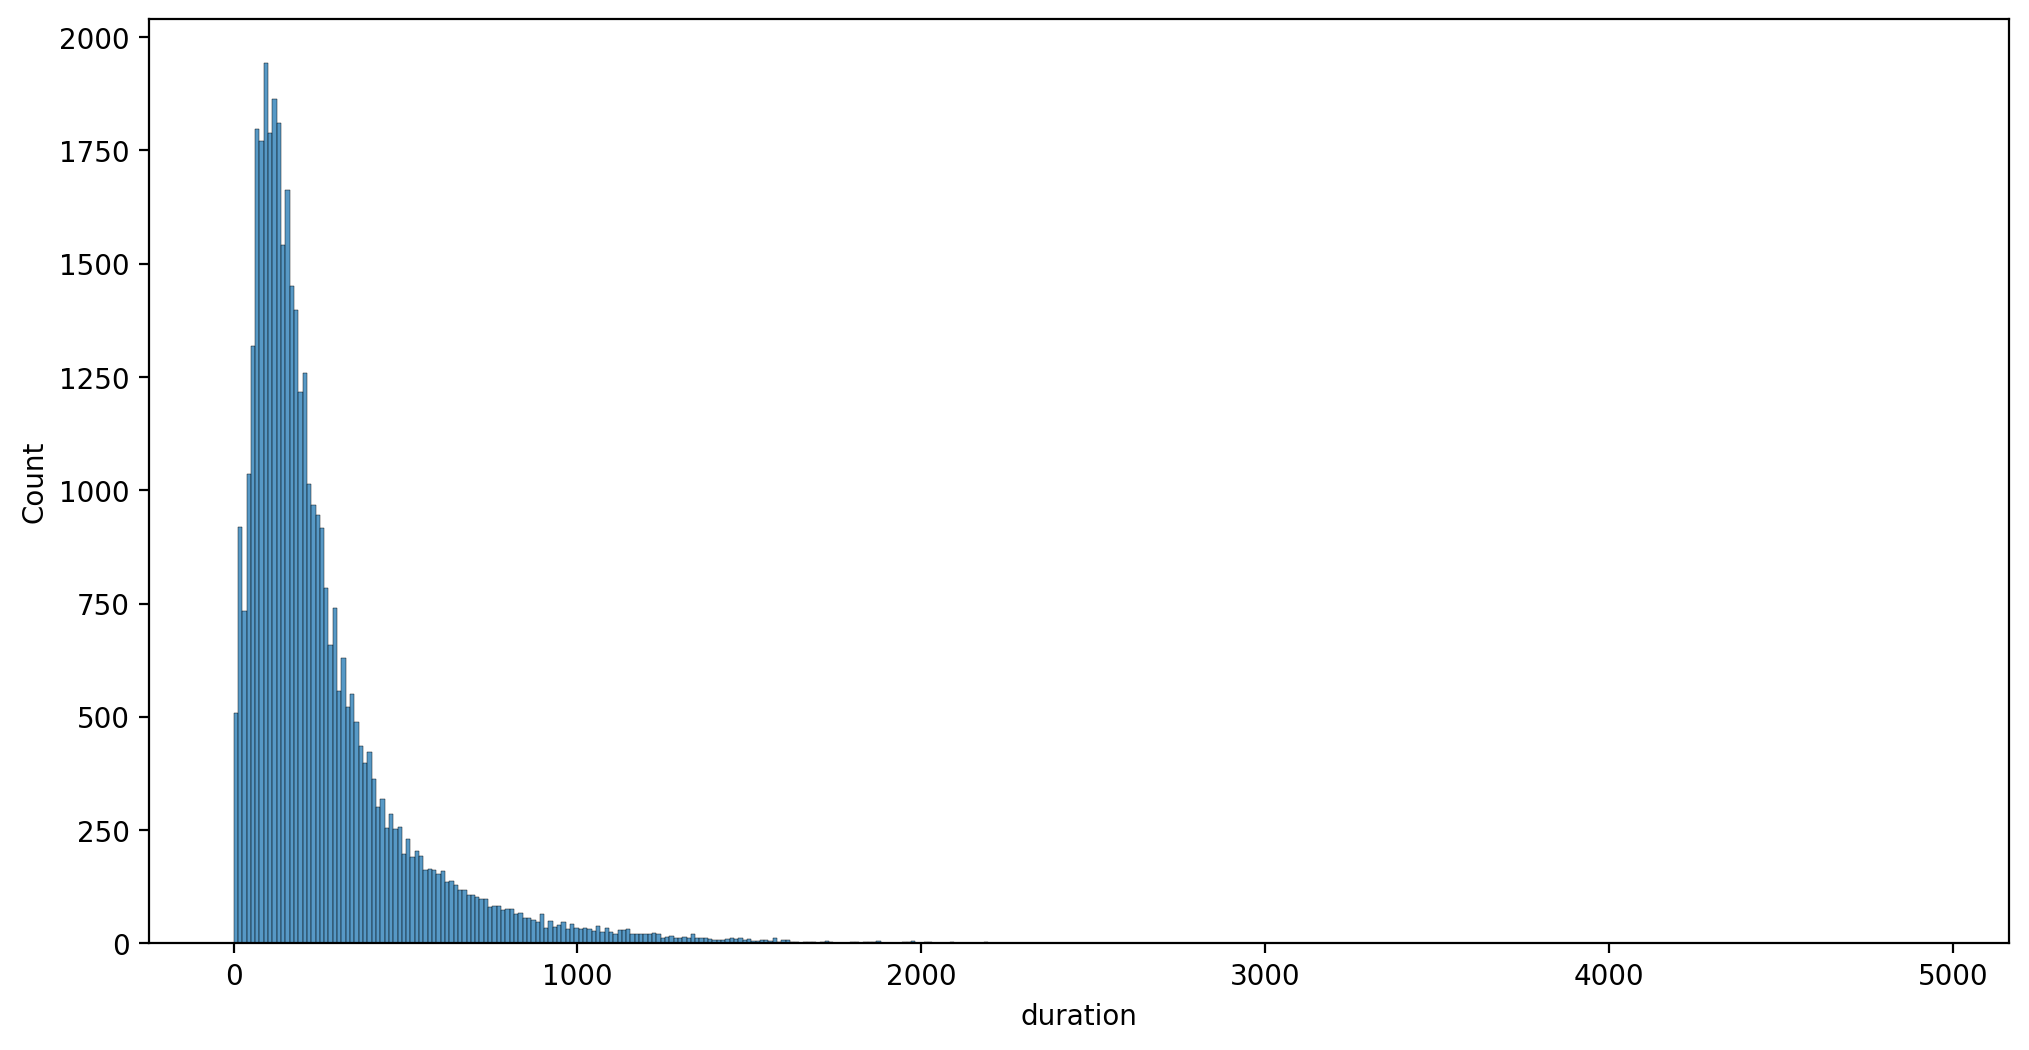

In [23]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="duration")

<Axes: xlabel='duration', ylabel='Count'>

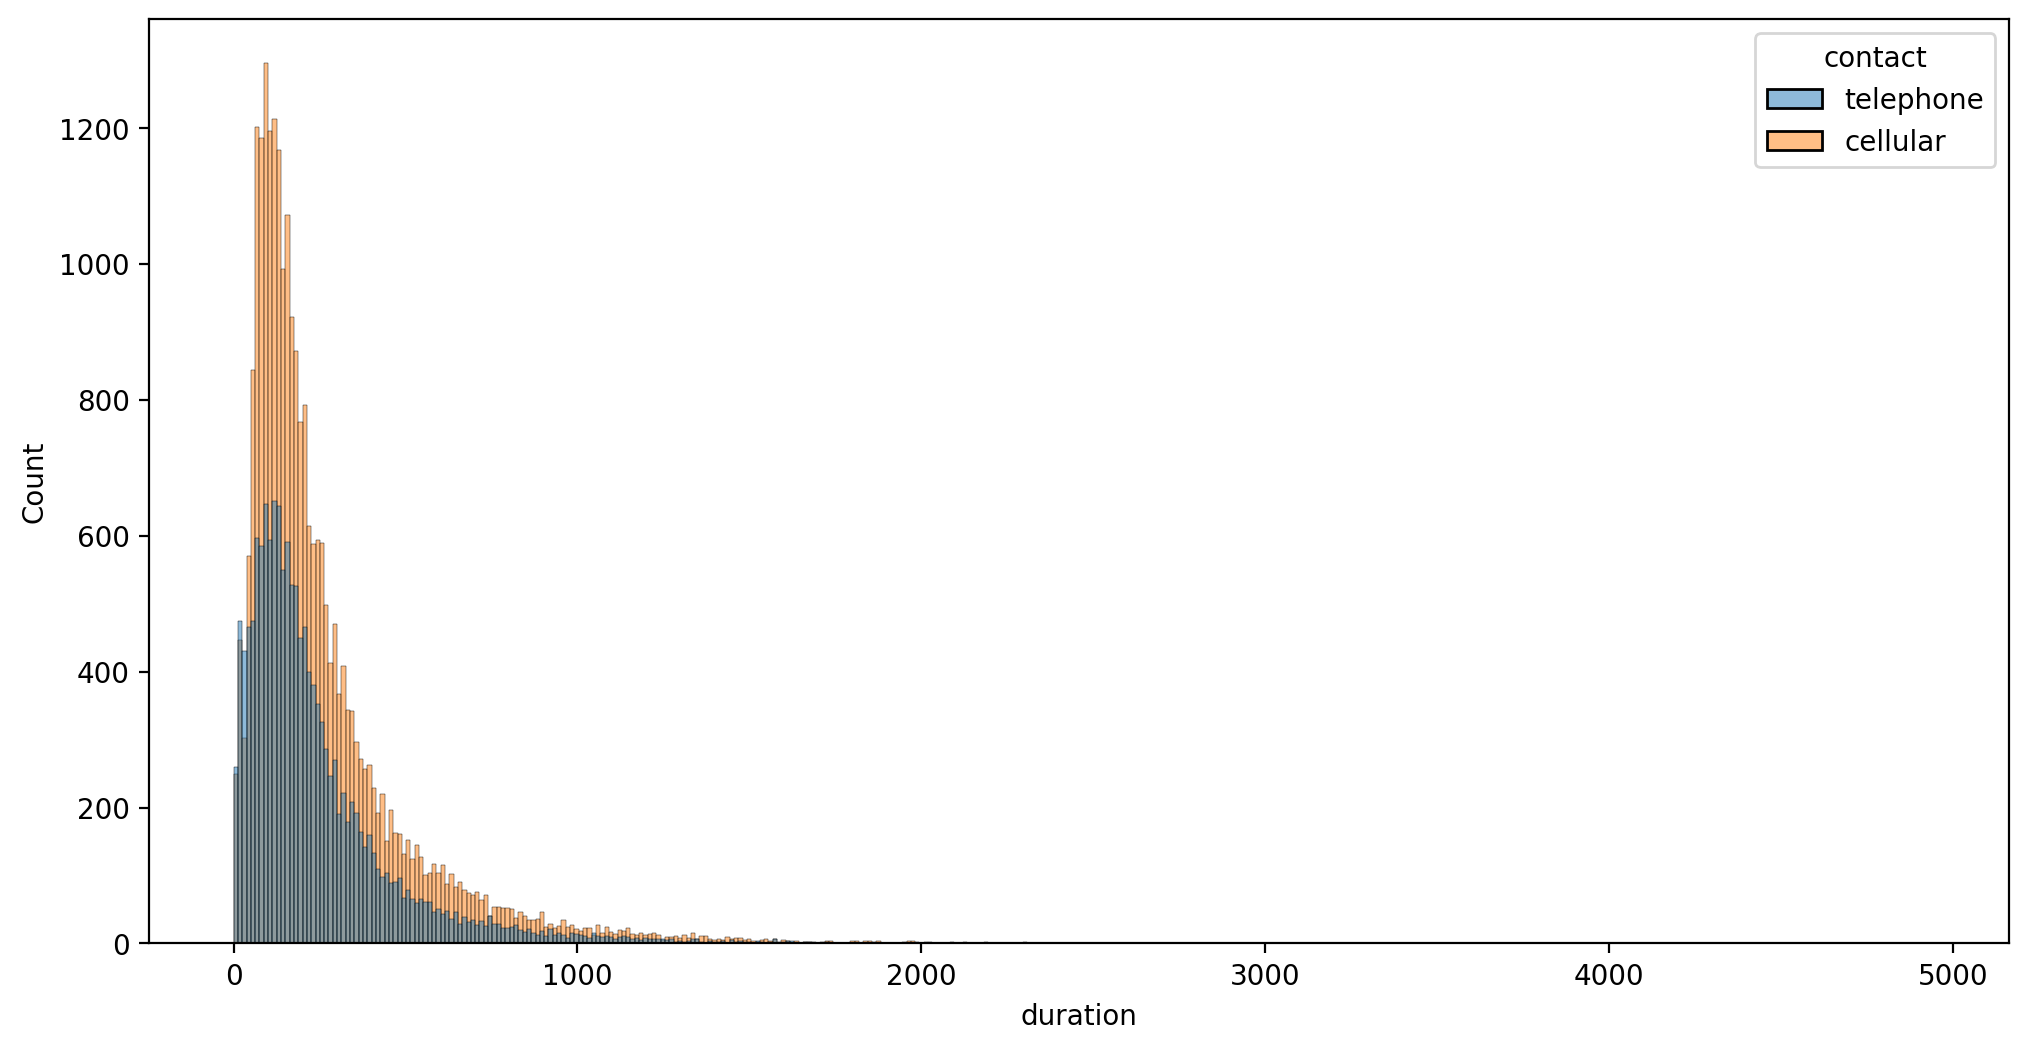

In [24]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="duration", hue="contact")

(0.0, 1000.0)

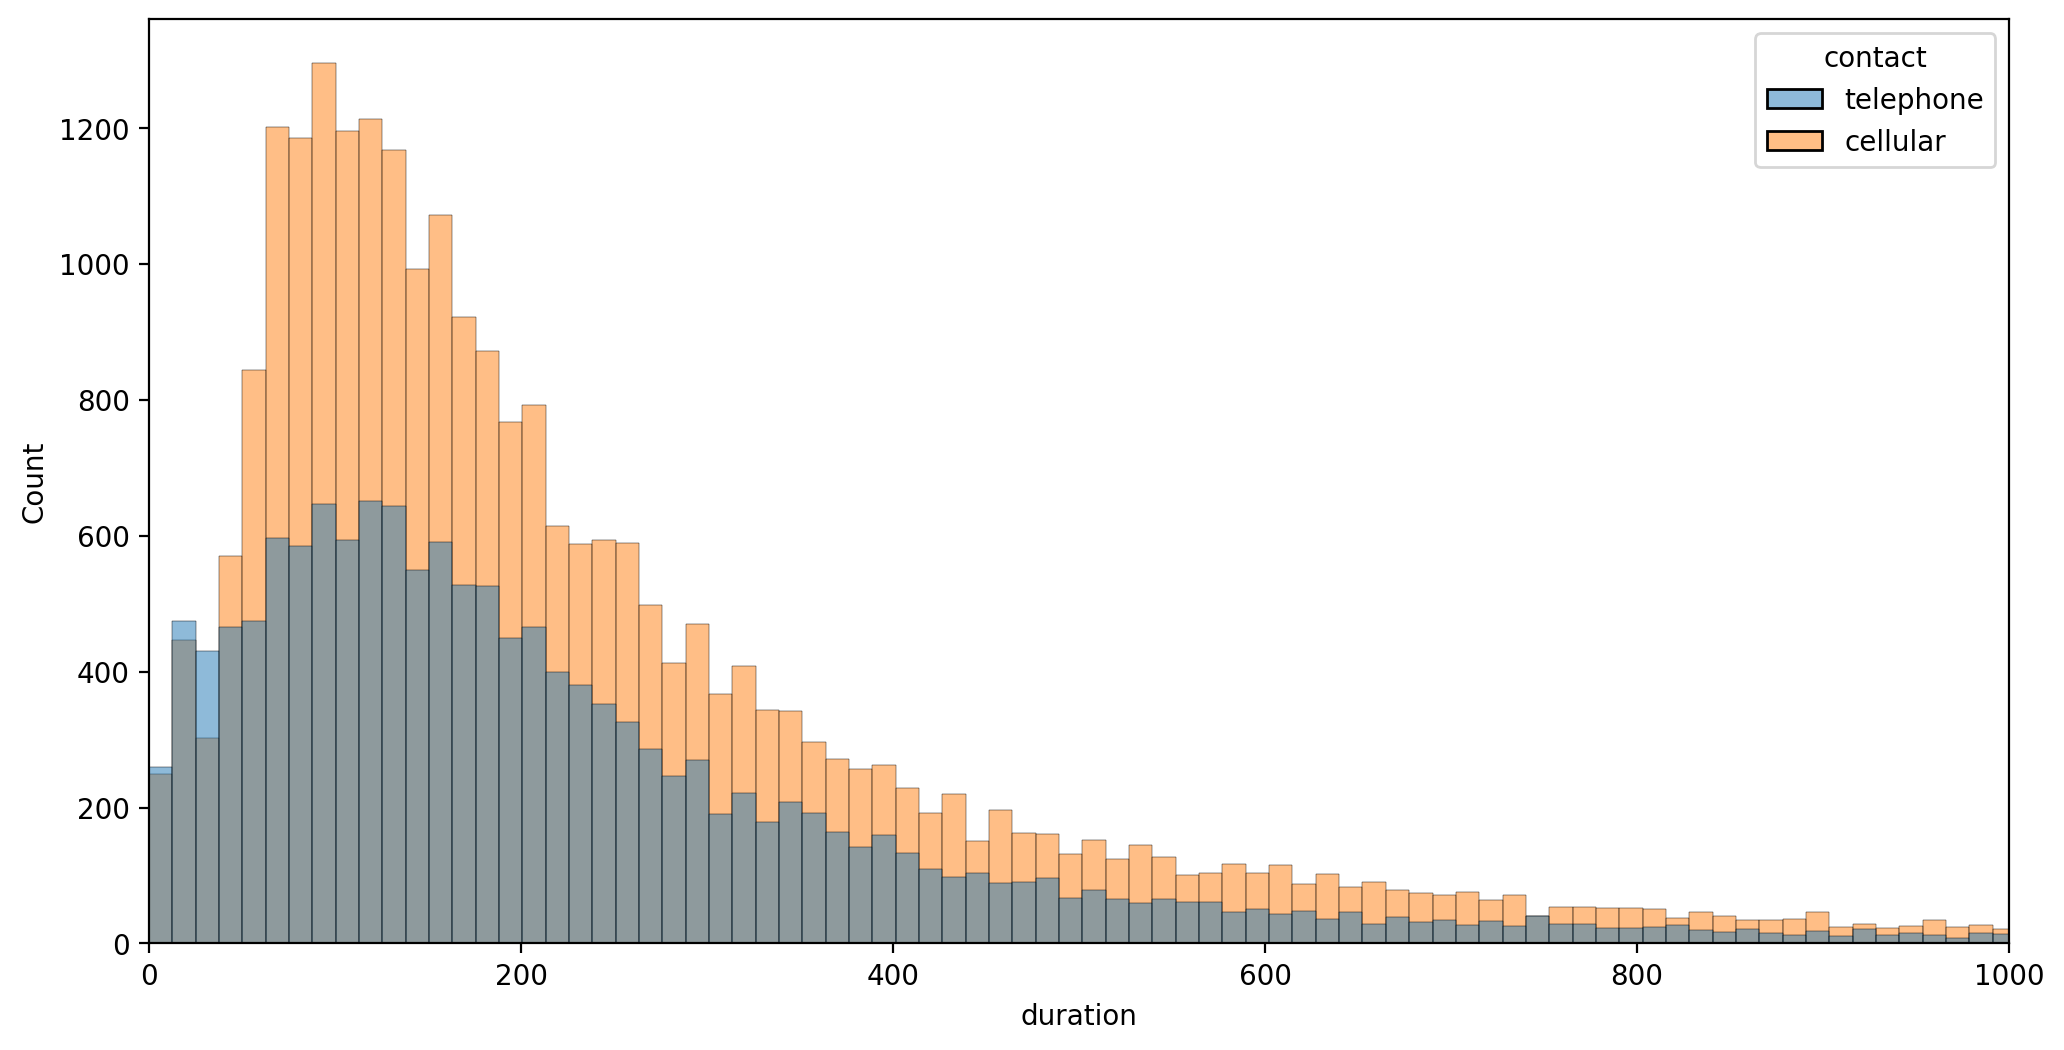

In [25]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="duration", hue="contact")
plt.xlim(0, 1000)

<Axes: xlabel='contact', ylabel='count'>

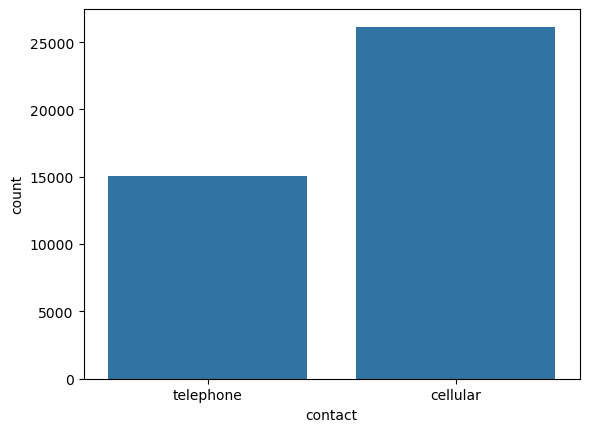

In [26]:
sns.countplot(data=df, x="contact")

In [38]:
df["job"].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object', name='job')

C:\Users\rd\AppData\Local\Temp\ipykernel_15748\978699532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="job", order=df["job"].value_counts().index, palette=sns.color_palette(palette="Paired", n_colors=12))


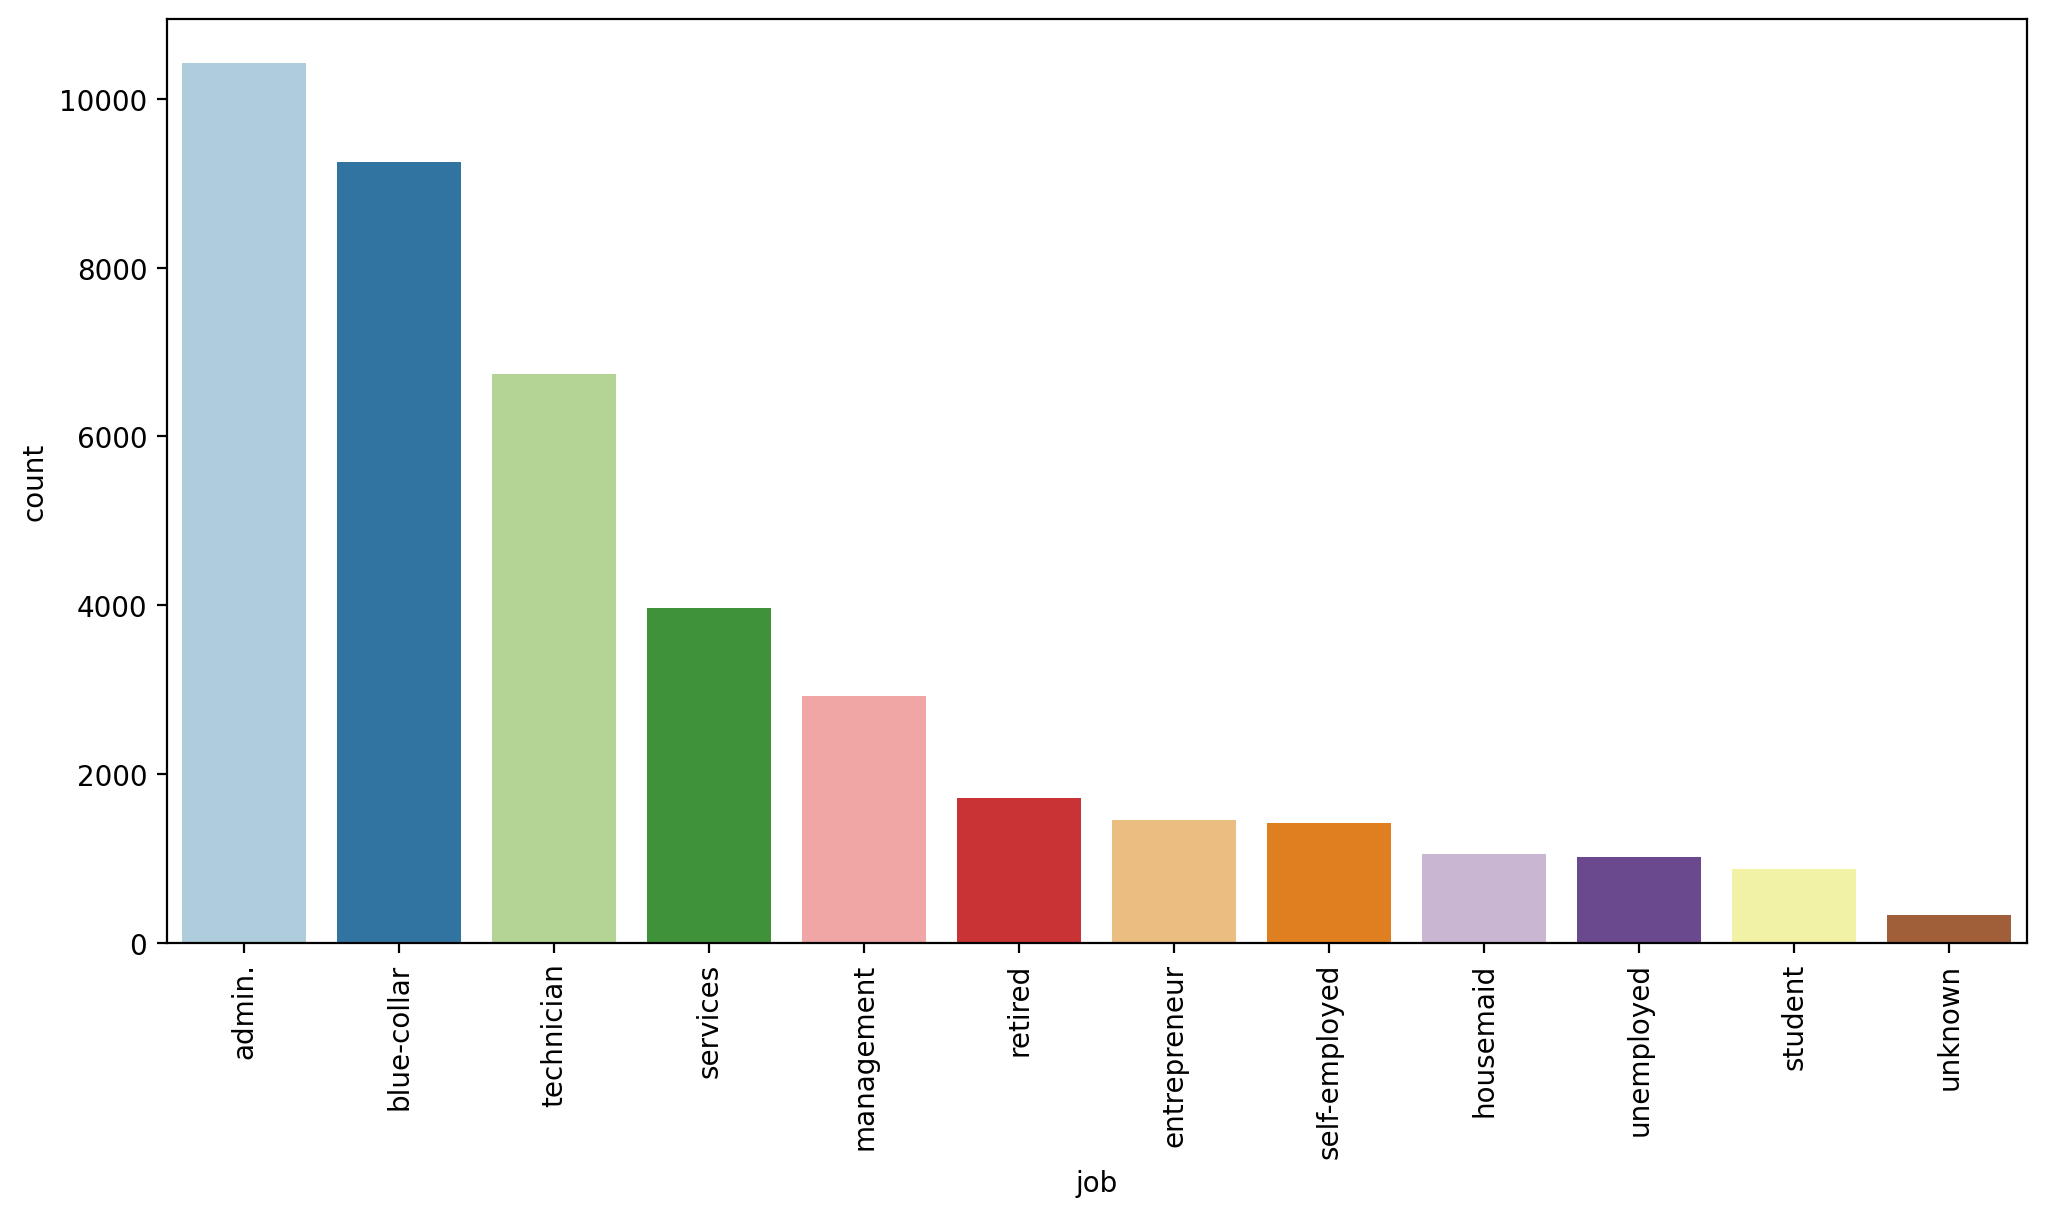

In [40]:
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df, x="job", order=df["job"].value_counts().index, palette=sns.color_palette(palette="Paired", n_colors=12))
plt.xticks(rotation=90);

C:\Users\rd\AppData\Local\Temp\ipykernel_15748\1662626331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="education", order=df["education"].value_counts().index, palette=sns.color_palette(palette="Paired", n_colors=7))
C:\Users\rd\AppData\Local\Temp\ipykernel_15748\1662626331.py:2: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x="education", order=df["education"].value_counts().index, palette=sns.color_palette(palette="Paired", n_colors=7))


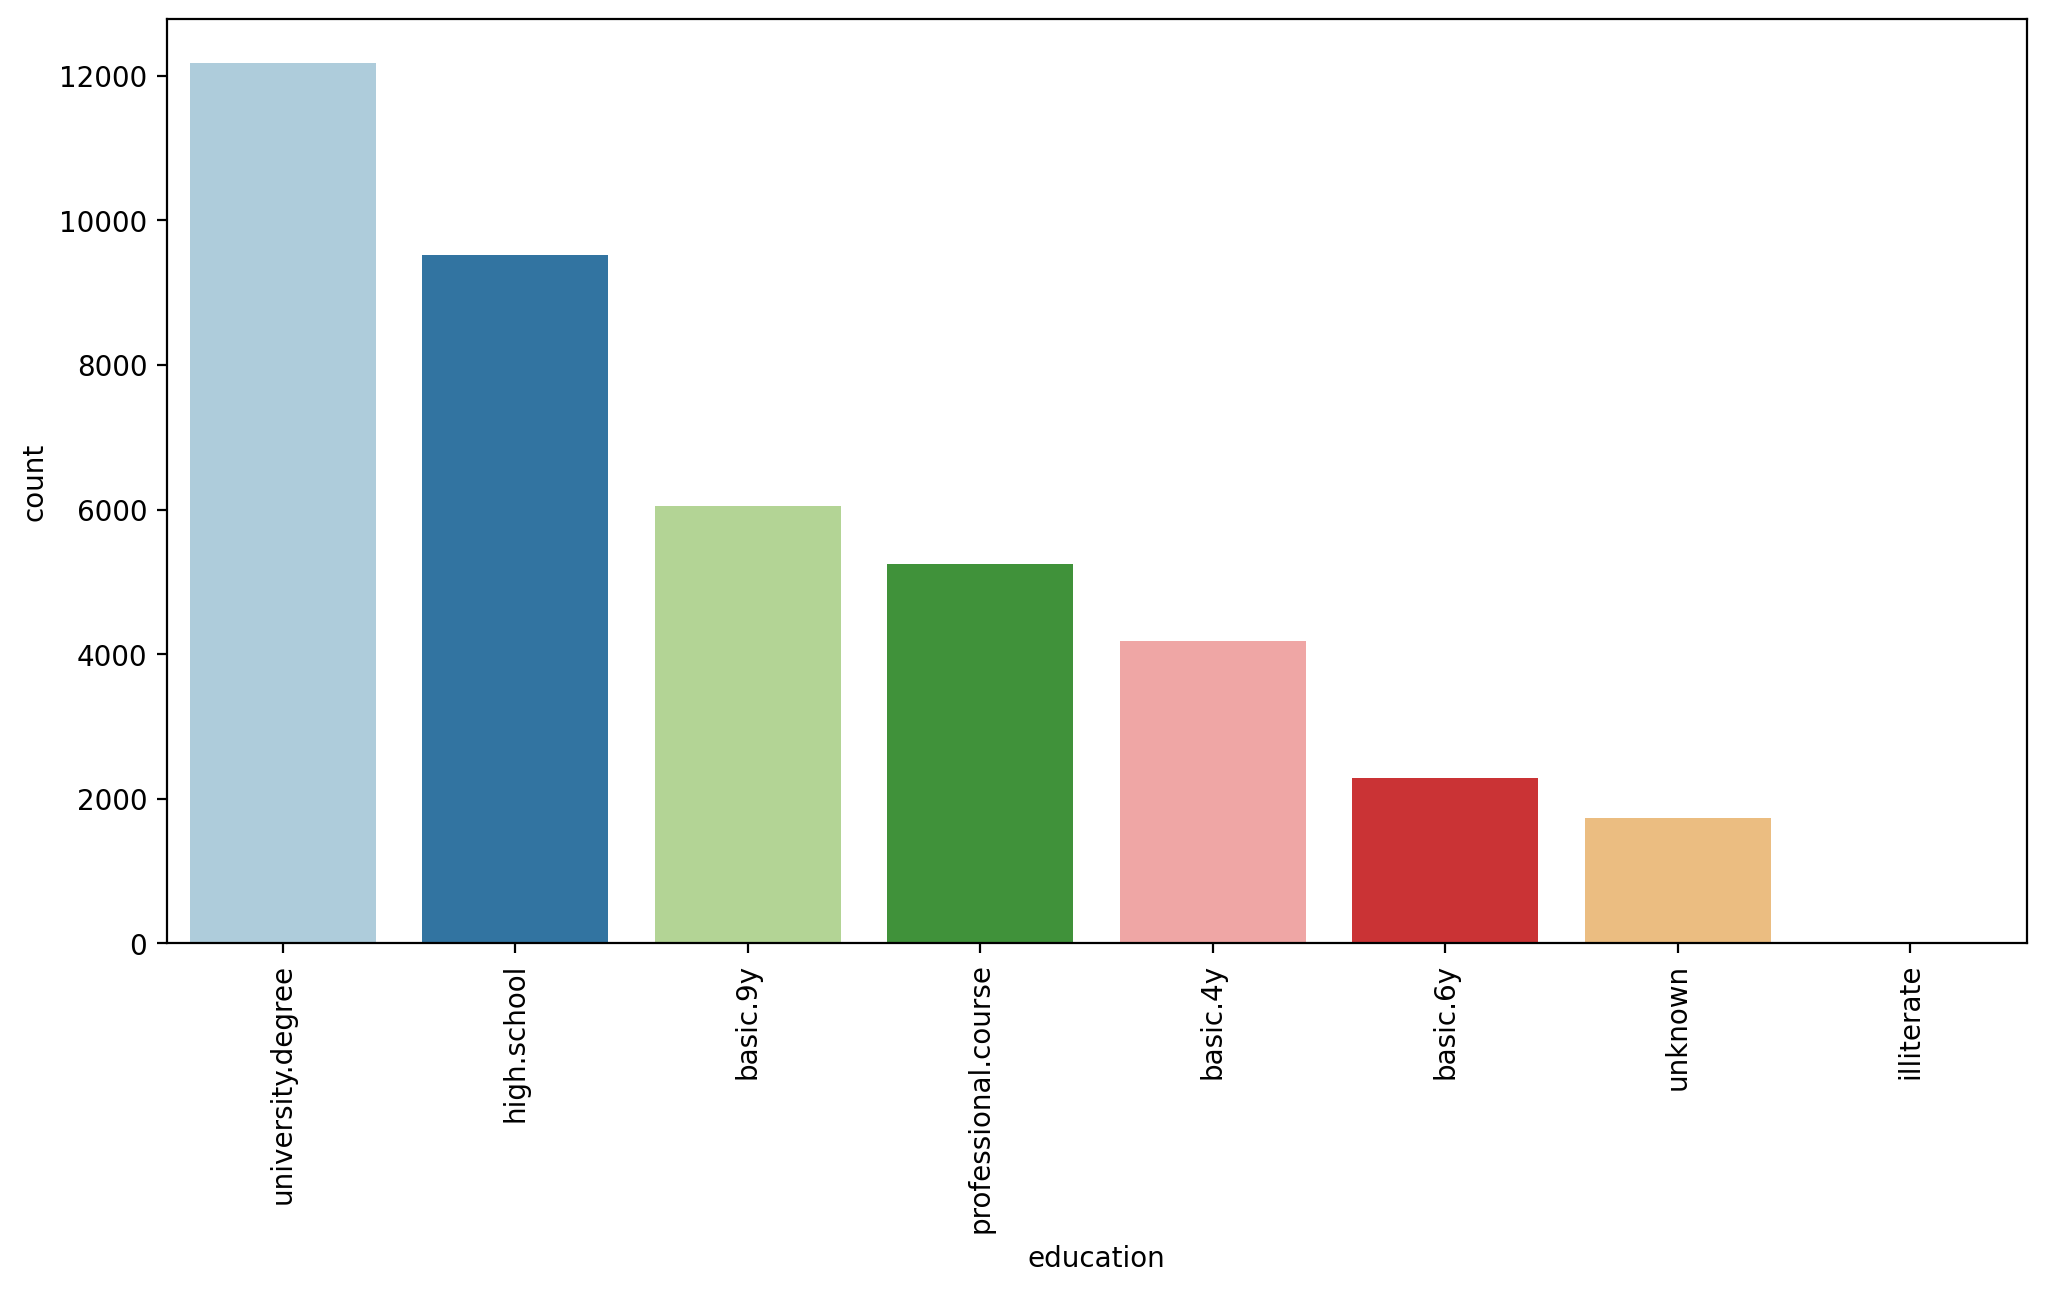

In [41]:
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df, x="education", order=df["education"].value_counts().index, palette=sns.color_palette(palette="Paired", n_colors=7))
plt.xticks(rotation=90);

C:\Users\rd\AppData\Local\Temp\ipykernel_15748\1561111160.py:2: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, x="education", order=df["education"].value_counts().index, hue="default", palette=sns.color_palette(palette="Paired", n_colors=7))


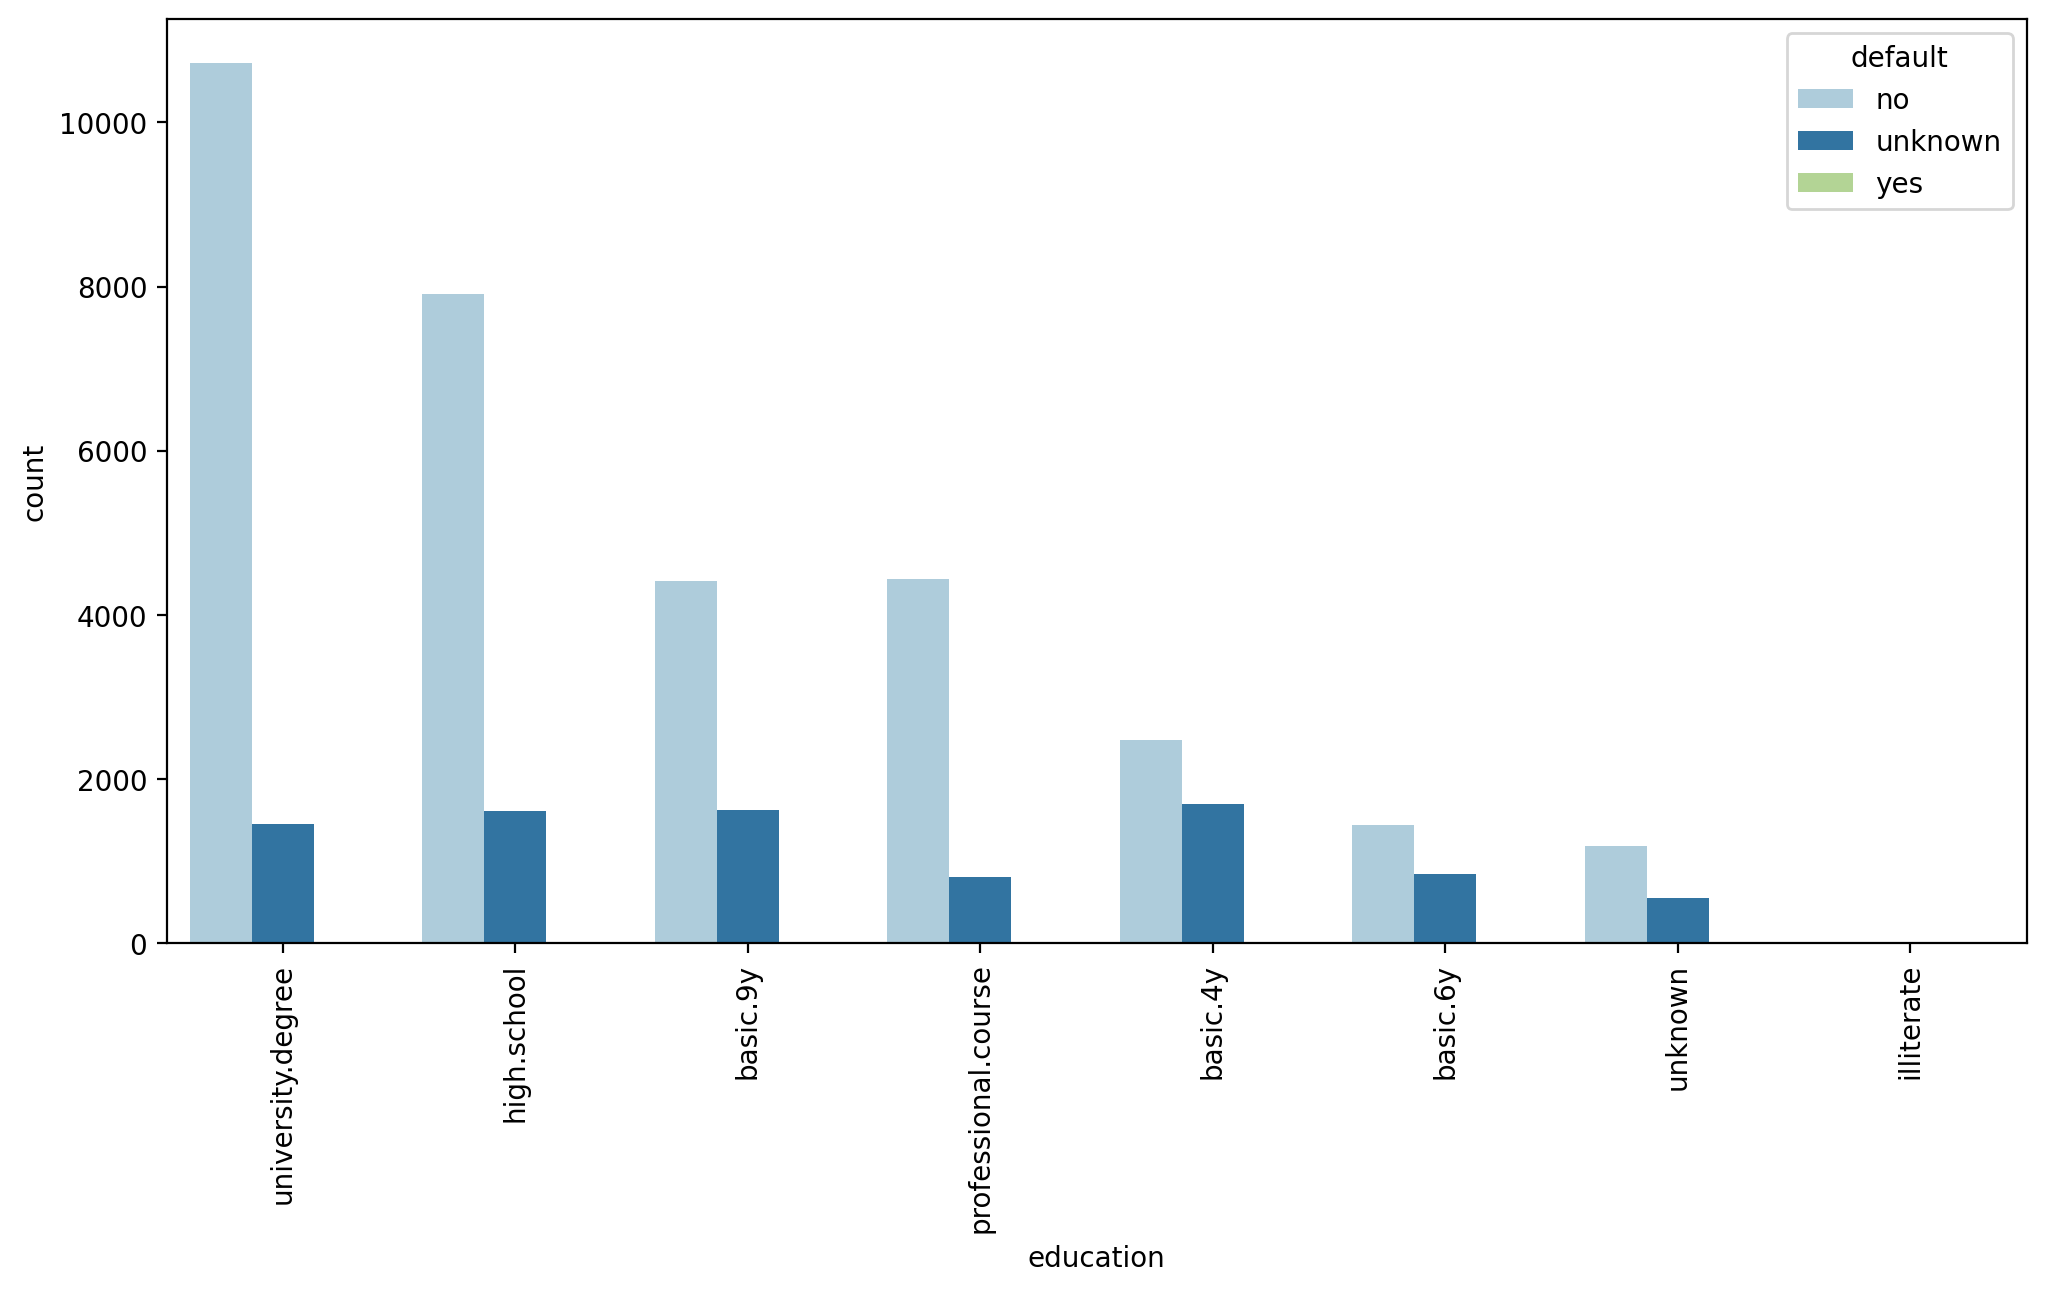

In [43]:
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df, x="education", order=df["education"].value_counts().index, hue="default", palette=sns.color_palette(palette="Paired", n_colors=7))
plt.xticks(rotation=90);

C:\Users\rd\AppData\Local\Temp\ipykernel_15748\3629128505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="default", palette=sns.color_palette(palette="Paired"))
C:\Users\rd\AppData\Local\Temp\ipykernel_15748\3629128505.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.countplot(data=df, x="default", palette=sns.color_palette(palette="Paired"))


<Axes: xlabel='default', ylabel='count'>

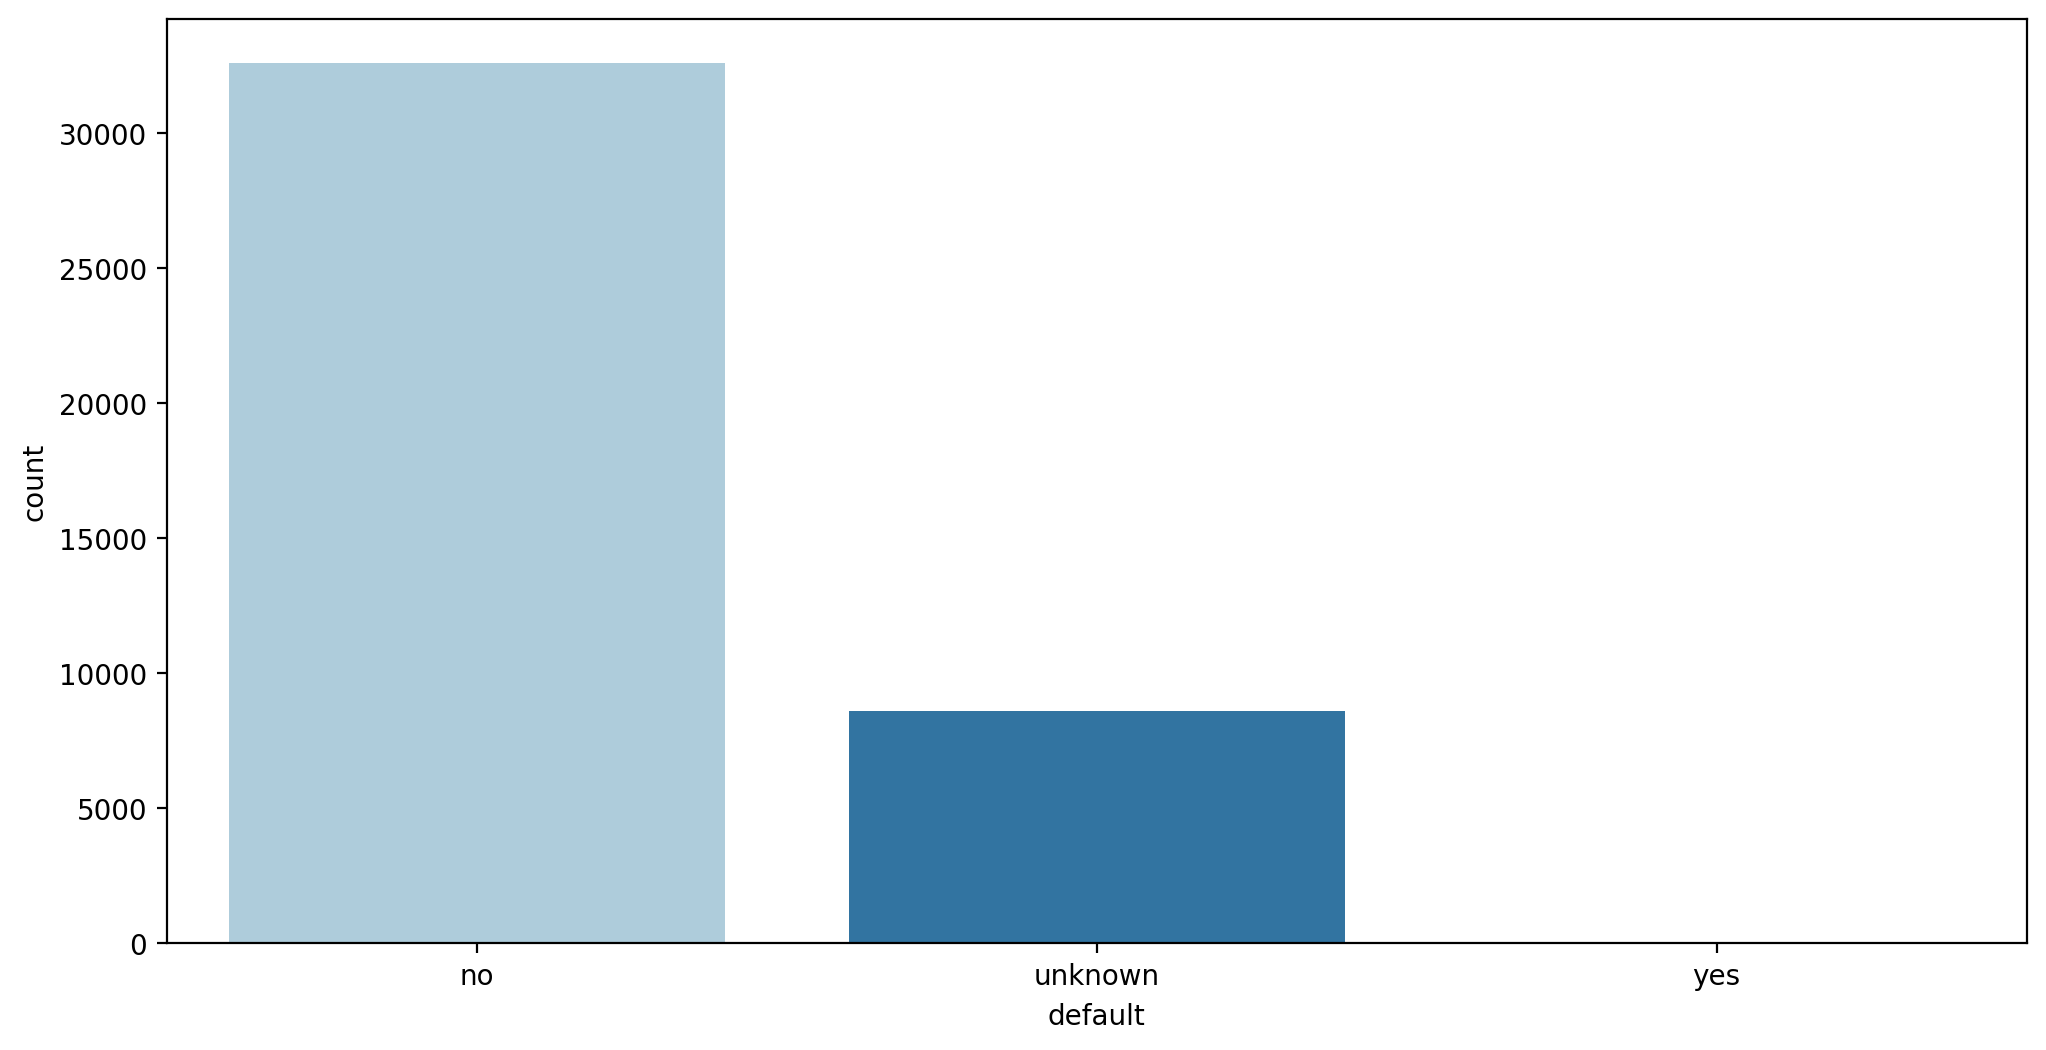

In [45]:
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df, x="default", palette=sns.color_palette(palette="Paired"))

In [46]:
df["default"].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [48]:
df["loan"].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

C:\Users\rd\AppData\Local\Temp\ipykernel_15748\2337766767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="loan", palette=sns.color_palette(palette="Paired"))
C:\Users\rd\AppData\Local\Temp\ipykernel_15748\2337766767.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.countplot(data=df, x="loan", palette=sns.color_palette(palette="Paired"))


<Axes: xlabel='loan', ylabel='count'>

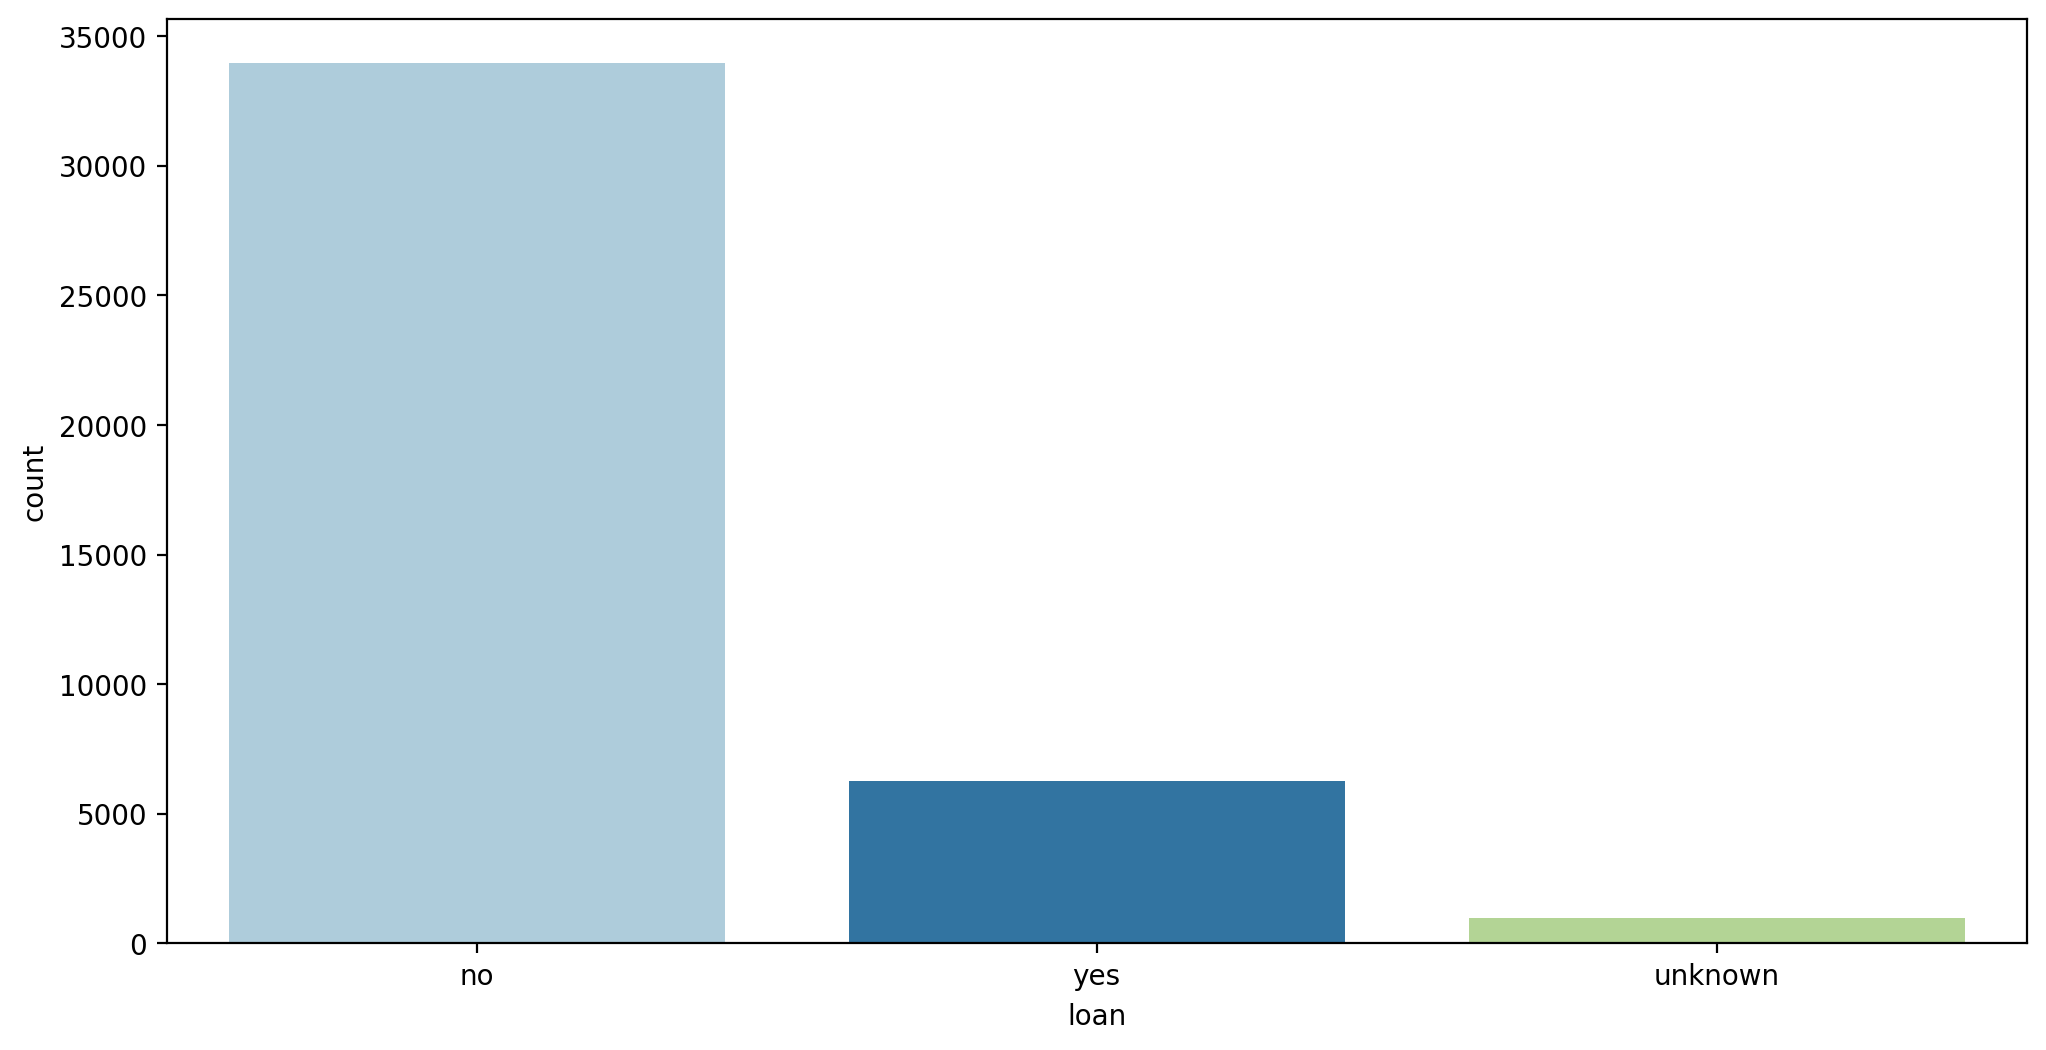

In [52]:
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df, x="loan", palette=sns.color_palette(palette="Paired"))

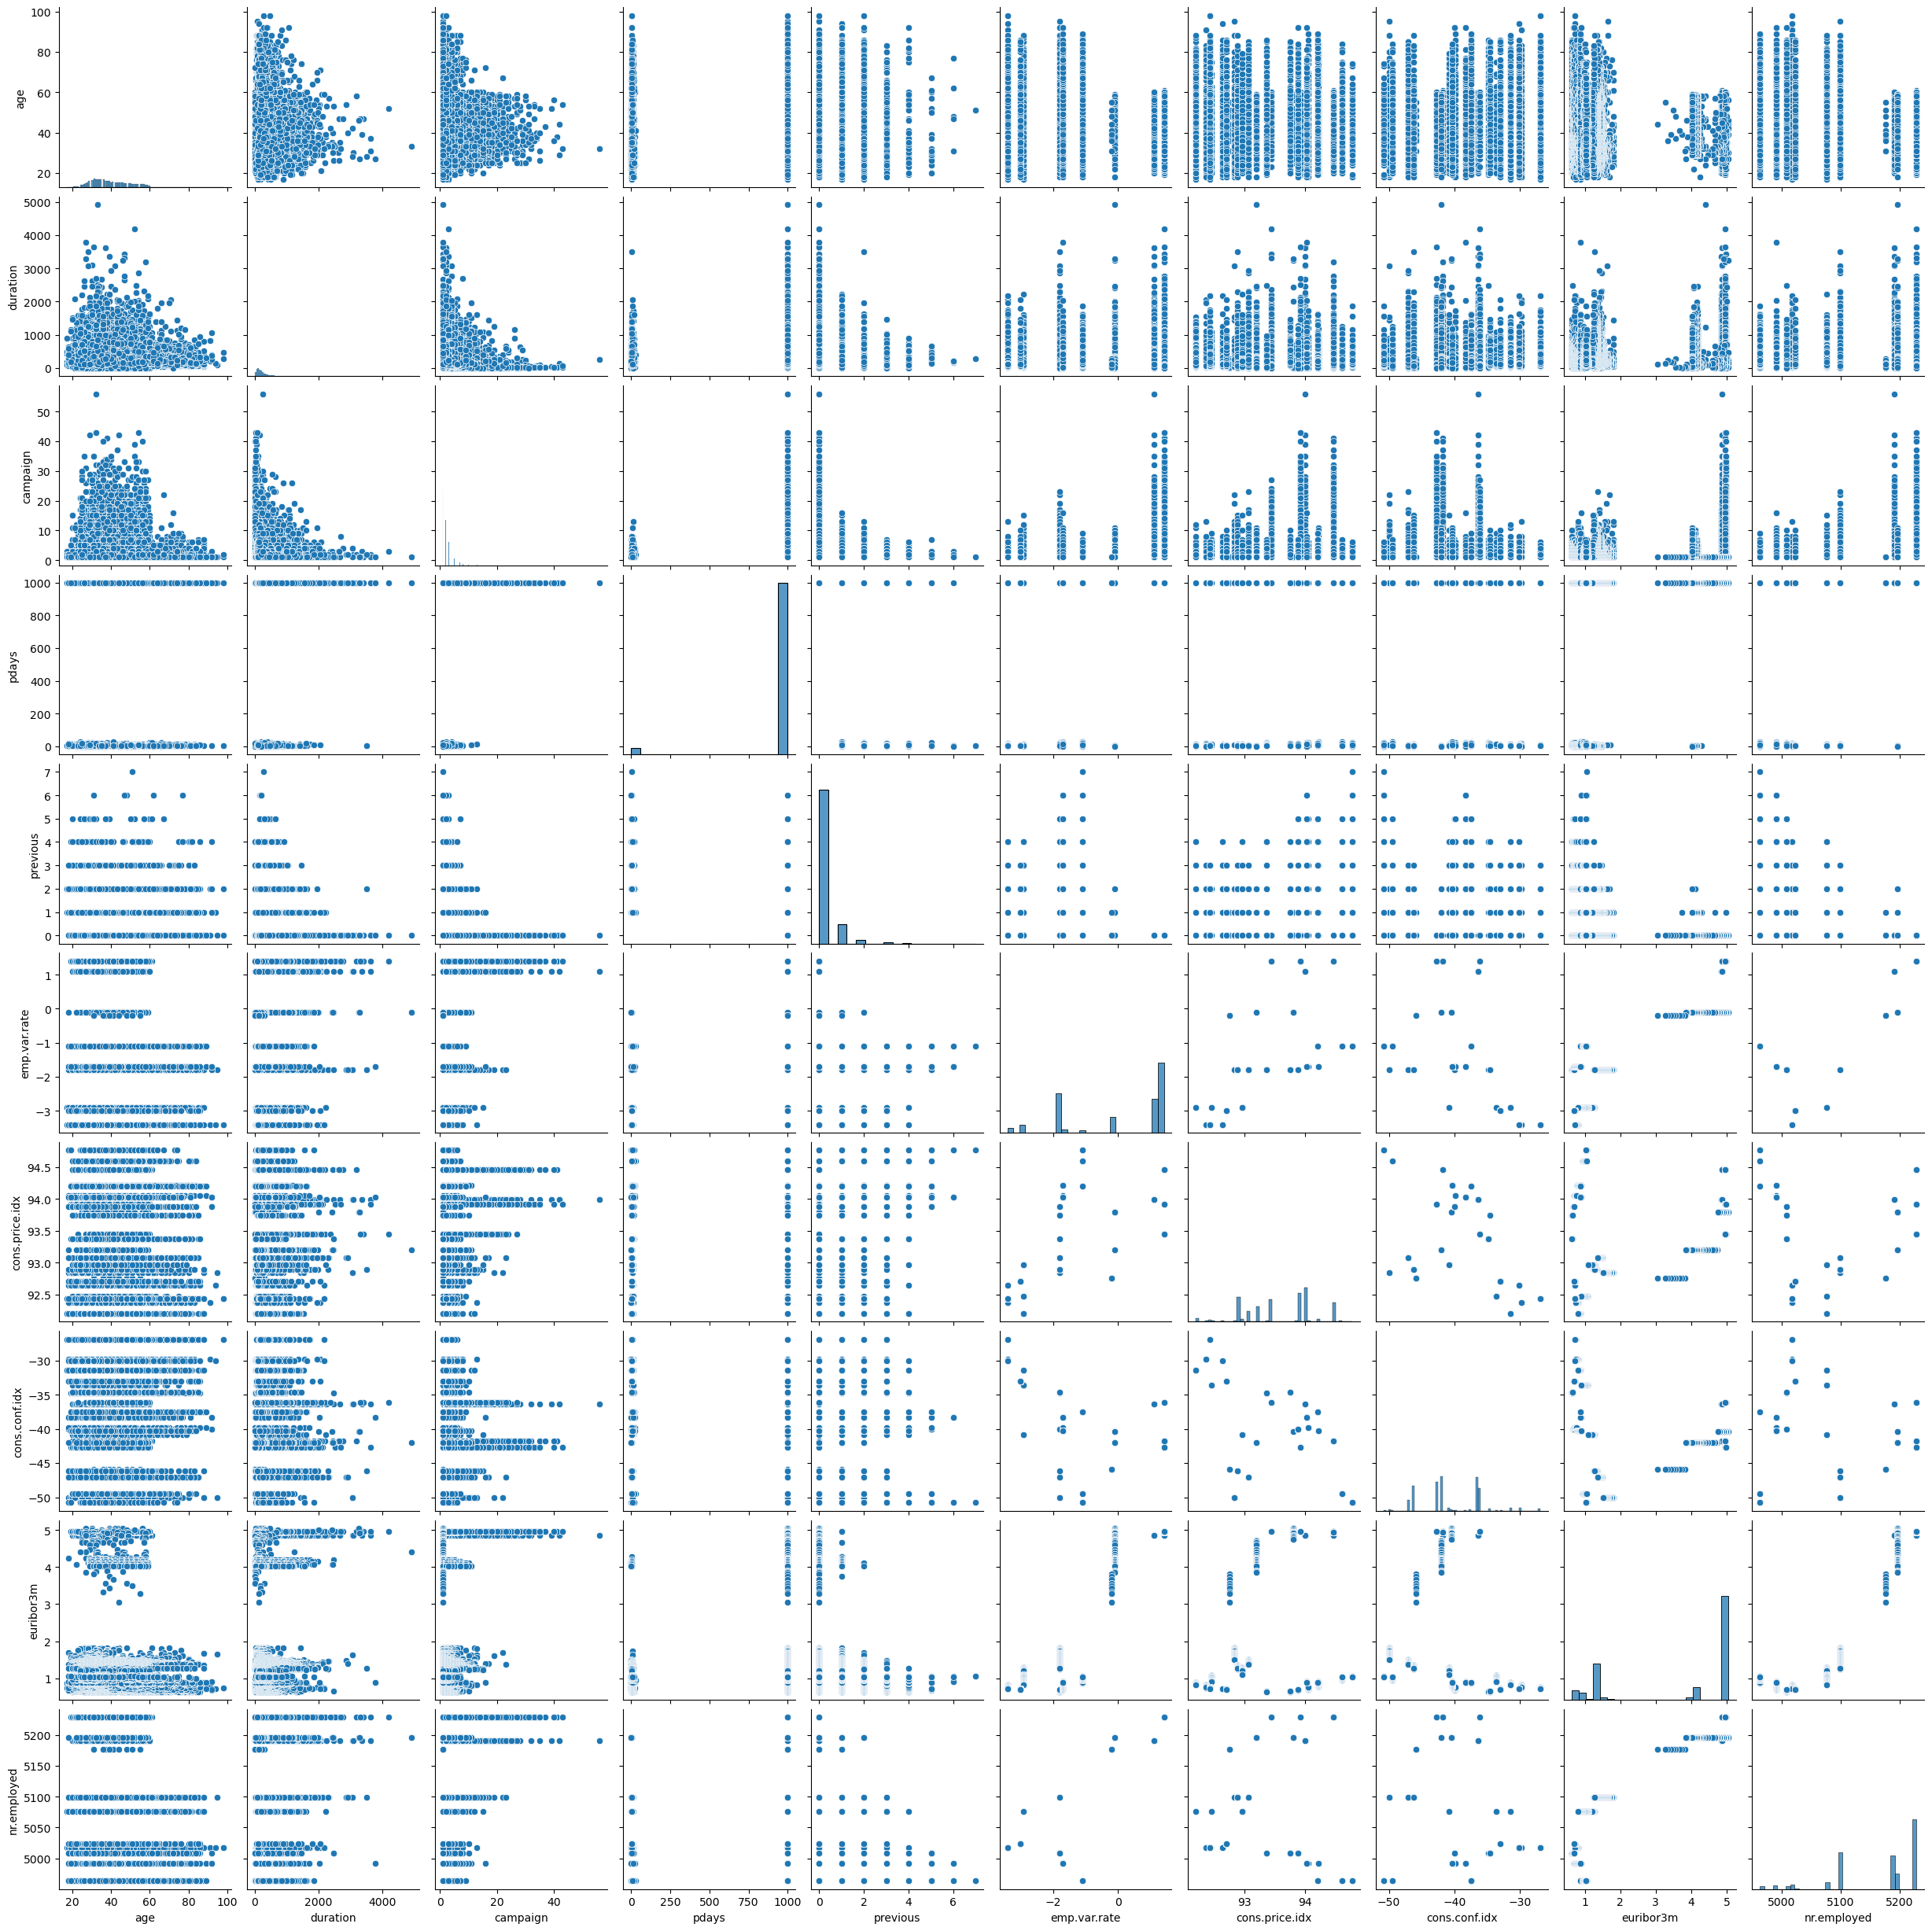

In [53]:
sns.pairplot(data=df)

In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

<Axes: xlabel='age', ylabel='job'>

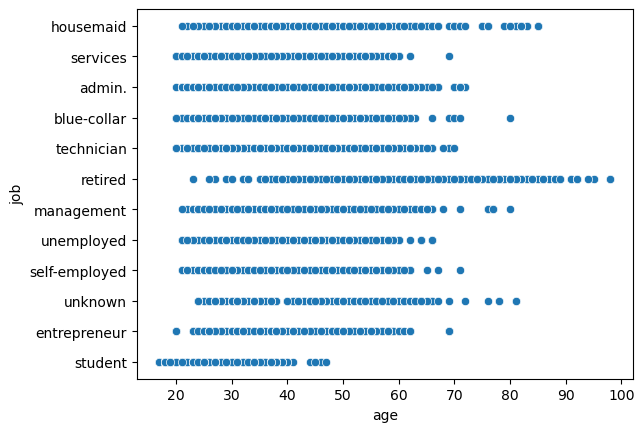

In [56]:
sns.scatterplot(data=df, x='age', y='job')

## Part.2

In [58]:
df["age"].head()


0    56
1    57
2    37
3    40
4    56
Name: age, dtype: int64

In [59]:
df["job"].head()

0    housemaid
1     services
2     services
3       admin.
4     services
Name: job, dtype: object

In [60]:
X = pd.get_dummies(df)

In [61]:
X.shape

(41188, 65)

In [62]:
df.shape

(41188, 21)

In [71]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [85]:
scaled_X = scaler.fit_transform(X)

In [87]:
scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [79]:
from sklearn.cluster import KMeans

In [109]:
model = KMeans(n_clusters=2, random_state=101)

In [111]:
cluster_labels = model.fit_predict(scaled_X)

In [113]:
cluster_labels.shape

(41188,)

In [115]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [117]:
X["Cluster"] = cluster_labels

In [119]:
X.shape

(41188, 66)

In [123]:
X.corr().shape

(66, 66)

In [125]:
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,0.019659
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,-0.040051
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,0.129101
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,0.267686
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,-0.478442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,0.544348
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,-0.254379
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,0.294748
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,-0.294748


In [127]:
X.corr()["Cluster"]

age                     0.019659
duration               -0.040051
campaign                0.129101
pdays                   0.267686
previous               -0.478442
                          ...   
poutcome_nonexistent    0.544348
poutcome_success       -0.254379
subscribed_no           0.294748
subscribed_yes         -0.294748
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [129]:
X.corr()["Cluster"].shape

(66,)

In [131]:
X.corr()["Cluster"].sort_values()

previous           -0.478442
poutcome_failure   -0.464271
contact_cellular   -0.410508
month_apr          -0.357904
subscribed_yes     -0.294748
                      ...   
cons.price.idx      0.679394
nr.employed         0.886120
emp.var.rate        0.932603
euribor3m           0.959267
Cluster             1.000000
Name: Cluster, Length: 66, dtype: float64

<Axes: >

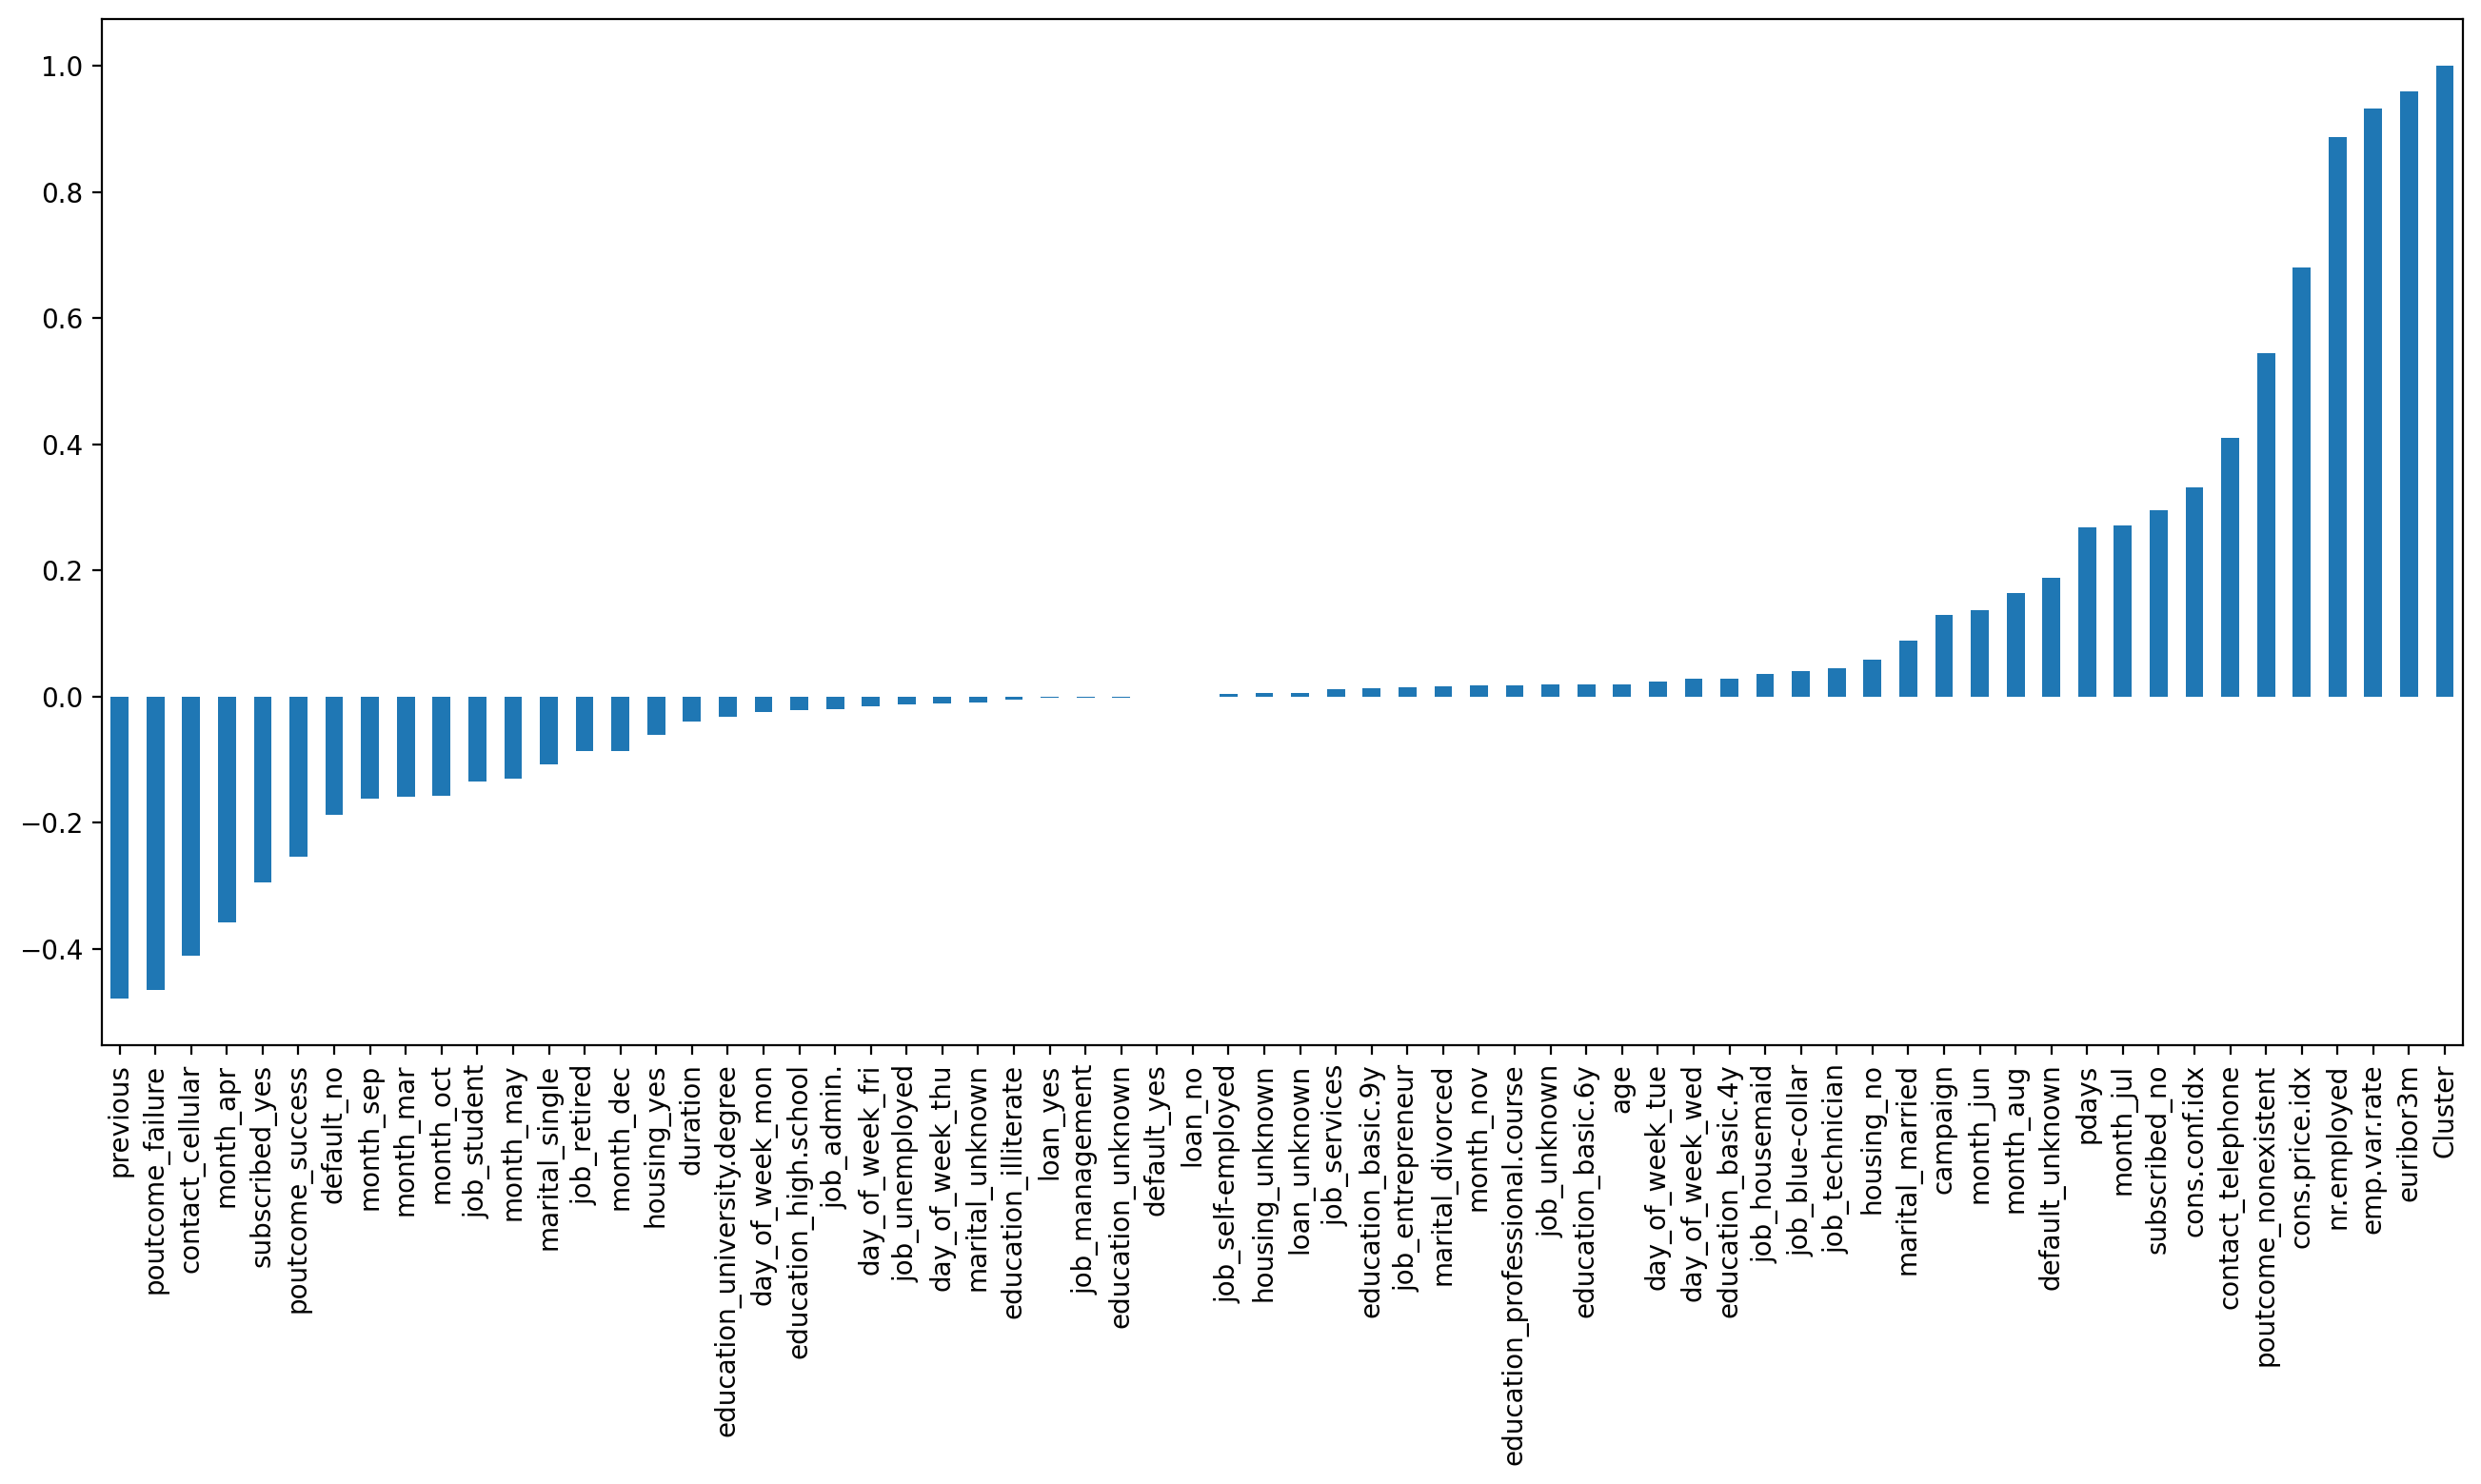

In [137]:
plt.figure(figsize=(16, 7), dpi=200)
X.corr()["Cluster"].sort_values().plot(kind="bar")

## Part.3: Choosing a K value

<Axes: >

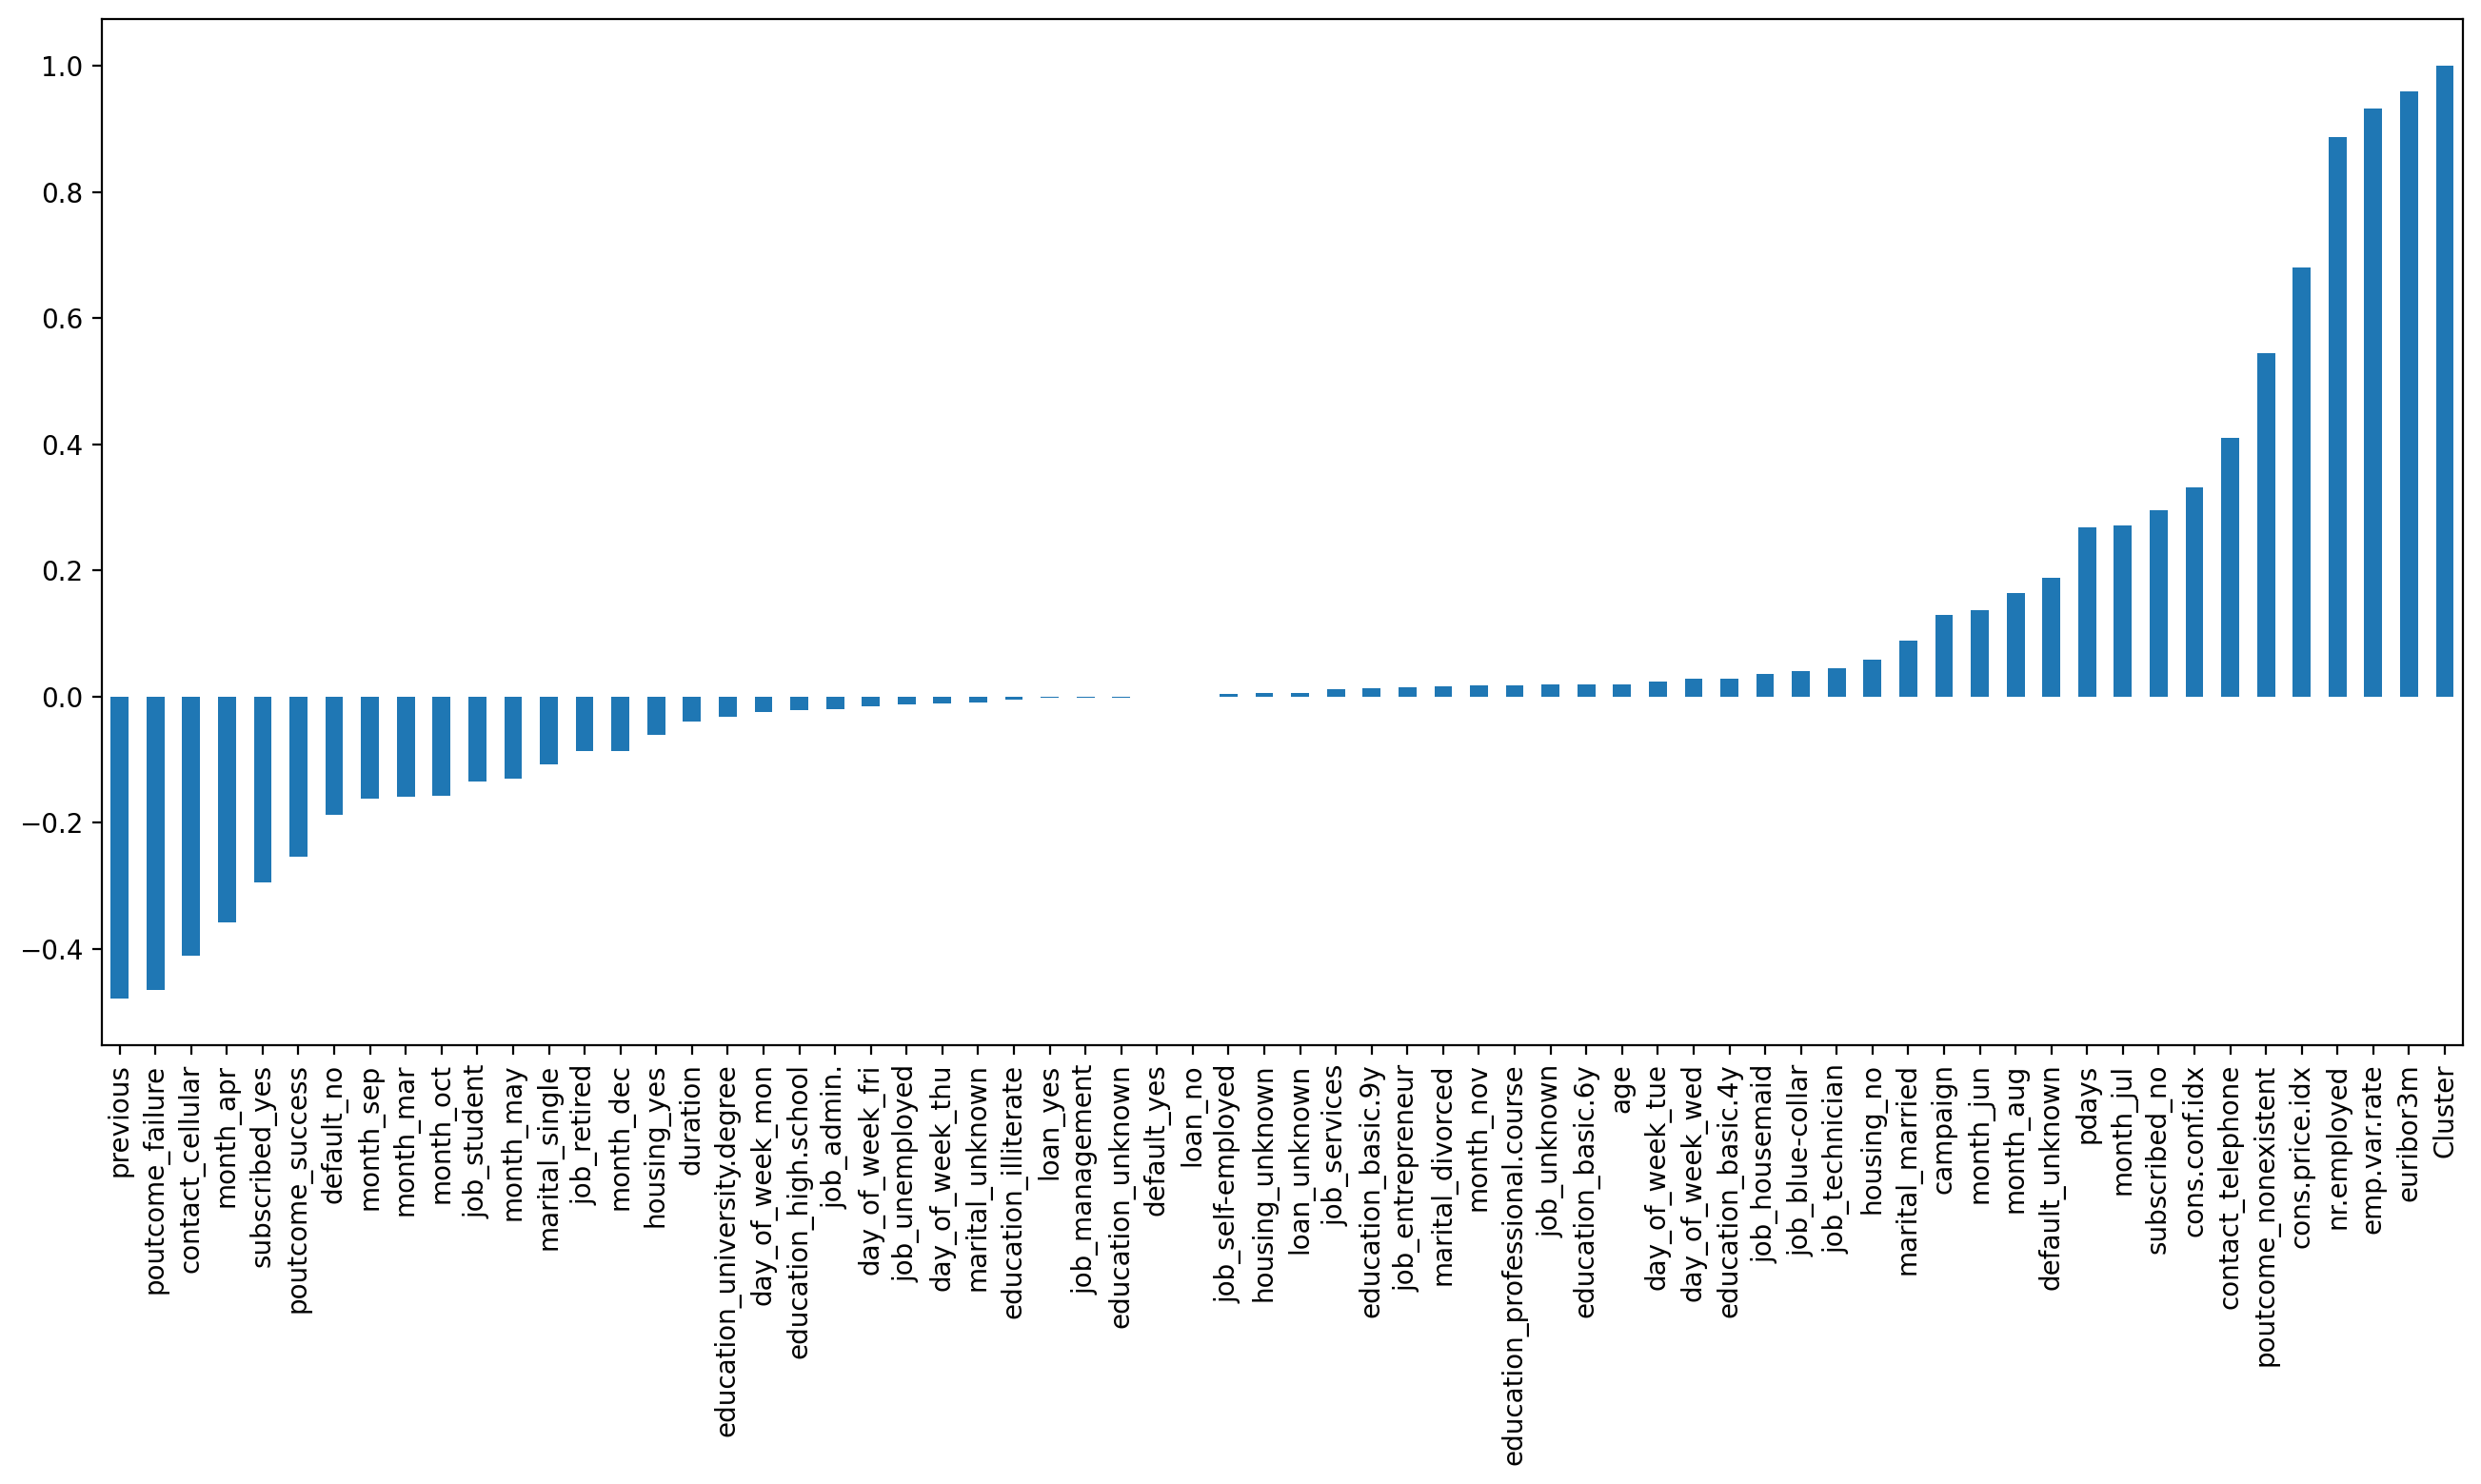

In [144]:
plt.figure(figsize=(16, 7), dpi=200)
X.corr()["Cluster"].sort_values().plot(kind="bar")

In [170]:
ssd = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_) 
    # SSD point --> cluster center
    

In [172]:
ssd

[2469792.492062293,
 2370786.439076343,
 2271502.8349983282,
 2232318.5762208076,
 2180748.250997953,
 2208712.7469008723,
 2154546.0769860824,
 2041350.5130308531]

In [174]:
len(ssd)

8

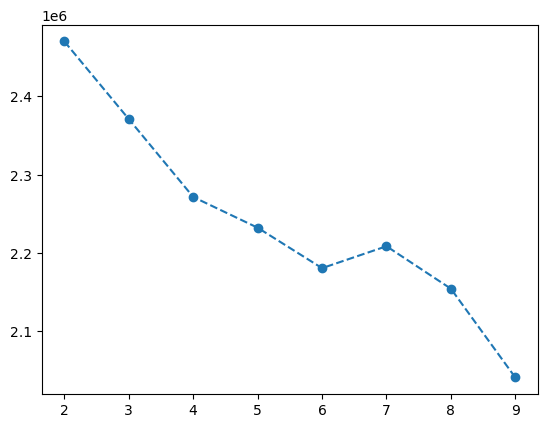

In [176]:
plt.plot(range(2,10), ssd, "o--")

In [179]:
pd.Series(ssd).diff()

0              NaN
1    -99006.052986
2    -99283.604078
3    -39184.258778
4    -51570.325223
5     27964.495903
6    -54166.669915
7   -113195.563955
dtype: float64

In [183]:
pd.Series(ssd).diff().shape

(8,)

In [185]:
pd.Series([12,3,4,5,6,7]).diff()

0    NaN
1   -9.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64

<Axes: >

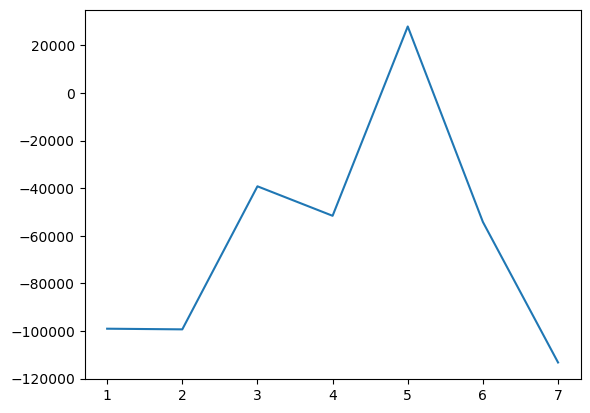

In [187]:
pd.Series(ssd).diff().plot()

# K-Means Cluster Color Quantization 

## Part.1: General Concepts
## Part.2: Coding

In [196]:
import matplotlib.image as mpimg

In [198]:
image_as_array = mpimg.imread("C://Users//rd//Documents/UDEMY/DATA/palm_trees.jpg")

In [202]:
image_as_array.shape

(1401, 934, 3)

In [204]:
image_as_array # (H, W, C)

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

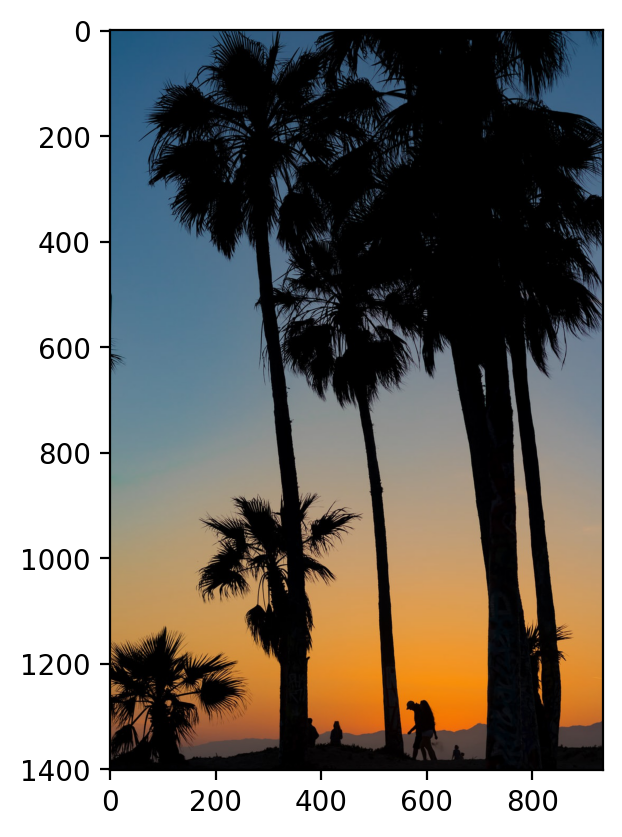

In [208]:
plt.figure(dpi=200)
plt.imshow(image_as_array)

In [210]:
# (H, W, C) ---> 2D (H*W, C)

In [214]:
h, w, c = image_as_array.shape

In [216]:
c

3

In [218]:
h

1401

In [220]:
w

934

In [222]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [224]:
image_as_array2d.shape

(1308534, 3)

In [226]:
len(image_as_array2d)

1308534

In [228]:
len(image_as_array)

1401

In [232]:
len(image_as_array2d)

1308534

In [234]:
image_as_array2d.shape

(1308534, 3)

In [236]:
image_as_array.shape

(1401, 934, 3)

In [238]:
1401*934

1308534

In [244]:
len(image_as_array2d.shape)

2

In [246]:
len(image_as_array.shape)

3

In [250]:
from sklearn.cluster import KMeans

In [260]:
model = KMeans(n_clusters=6, random_state=101)

In [262]:
labels = model.fit_predict(image_as_array2d)

In [263]:
labels

array([3, 3, 3, ..., 1, 1, 1])

In [266]:
len(labels)

1308534

In [268]:
model.cluster_centers_

array([[141.25350131, 145.1504892 , 142.55037481],
       [  2.75896458,   2.57655285,   3.70047856],
       [196.16985316, 154.52892628, 104.2942536 ],
       [ 72.3758745 , 110.2046515 , 138.18818573],
       [ 67.14229864,  61.64547594,  62.28113232],
       [219.37553451, 133.45093373,  43.60329248]])

In [270]:
model.cluster_centers_.shape

(6, 3)

In [272]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [274]:
rgb_codes

array([[141, 145, 143],
       [  3,   3,   4],
       [196, 155, 104],
       [ 72, 110, 138],
       [ 67,  62,  62],
       [219, 133,  44]])

In [276]:
labels

array([3, 3, 3, ..., 1, 1, 1])

In [278]:
labels.shape

(1308534,)

In [280]:
type(labels)

numpy.ndarray

In [290]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([196735, 602846, 149793, 180899,  76464, 101797], dtype=int64))

In [284]:
pd.Series(labels).value_counts()

1    602846
0    196735
3    180899
2    149793
5    101797
4     76464
Name: count, dtype: int64

In [288]:
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [292]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [294]:
rgb_codes[labels].shape

(1308534, 3)

In [296]:
image_as_array2d.shape

(1308534, 3)

In [300]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [302]:
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [304]:
image_as_array.shape

(1401, 934, 3)

In [306]:
quantized_image.shape

(1401, 934, 3)

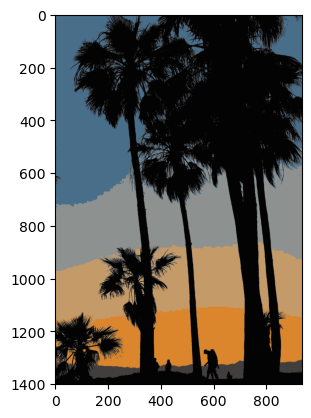

In [308]:
plt.imshow(quantized_image)
# cool!!!!!!!

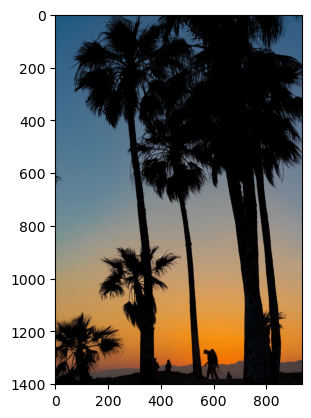

In [310]:
plt.imshow(image_as_array)